# Import delle librerie

In [31]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tslearn.clustering import silhouette_score

# carichiamo i risultati del k-means più serie temporali

In [36]:
with open('./pickles/kmeans_total.pickle', 'rb') as handle:
    kmeans_total = pickle.load(handle)

with open('./pickles/newSeries_total.pickle', 'rb') as handle:
    newSeries_total = pickle.load(handle)


# Andiamo a fare il plot della silhoutte

In [39]:
silhoutte = []

for a,s in zip(kmeans_total,newSeries_total):
    silhoutte.append([])
    for y_pred,new_series in zip(a,s):
        silhoutte[-1].append(silhouette_score(new_series,y_pred,metric="euclidean"))

In [40]:
# Abbiamo una matrice triangolare incompleta, dobbiamo riempirla.

matrice_silhoutte = np.zeros([int(155/5),int(155/5)])

for a,x in zip(silhoutte,range(0,int(150/5))):
    for c,y in zip(a,range(0,len(a))):
        matrice_silhoutte[x,y] = c

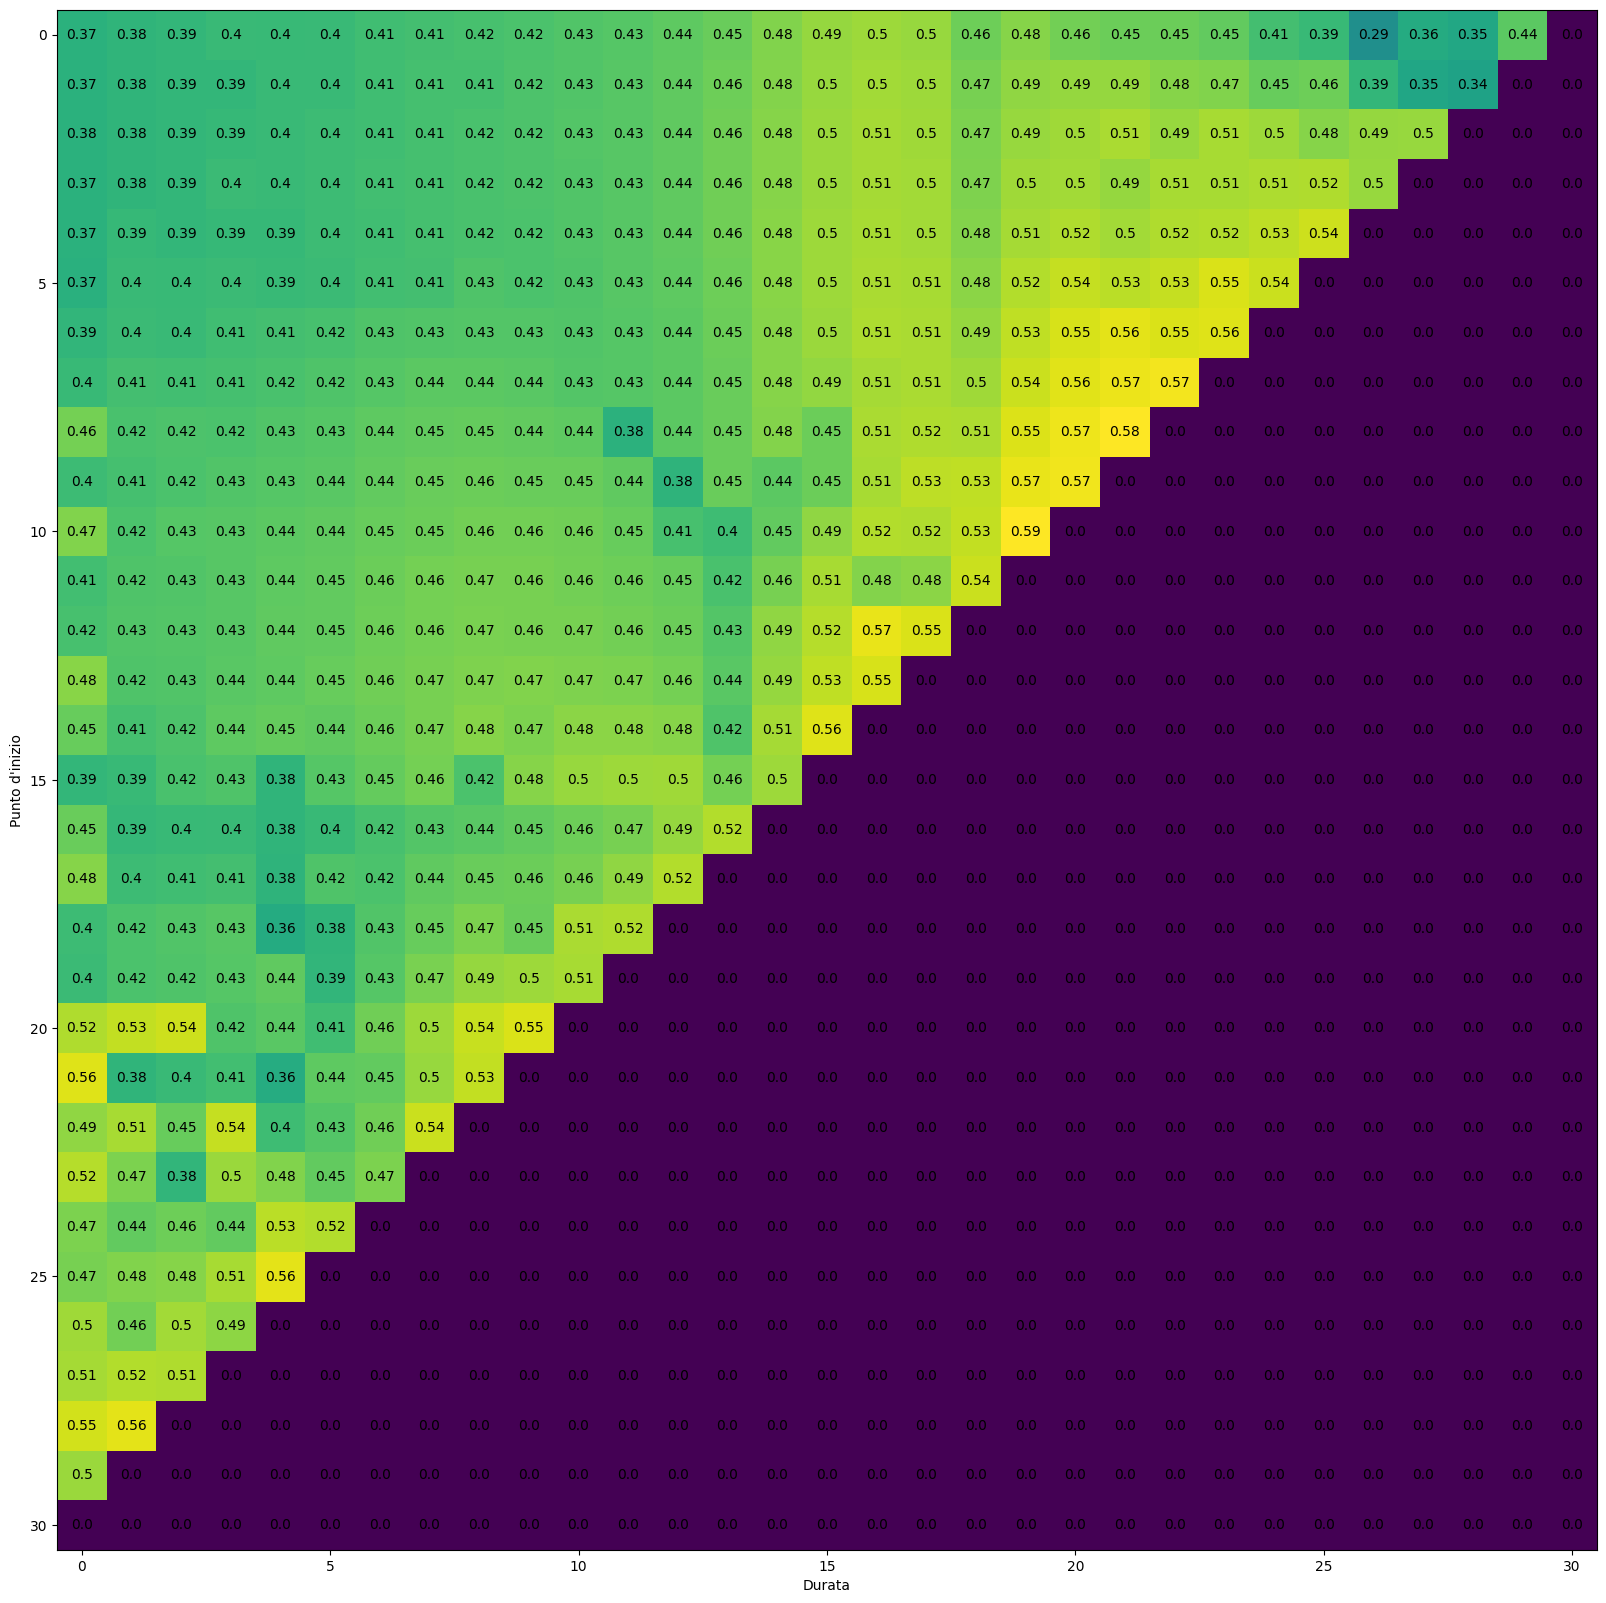

In [41]:
import matplotlib as mpl

fig, ax = plt.subplots()

image = ax.imshow(matrice_silhoutte)

plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(20,20)

for i in range(0,matrice_silhoutte.shape[0]):
    for j in range(0,matrice_silhoutte.shape[1]):
        c = np.round(matrice_silhoutte[i,j],decimals=2)
        ax.text(j, i, str(c), va='center', ha='center')

# Metriche di coesione, deviazione standard

In [47]:
result = []
cluster_deviation = []

for p in range(0,num_cluster):
        cluster_deviation.append([])



for a,s,rese in zip(kmeans_total,newSeries_total,rese_total):
    result.append([])
    for p in range(0,num_cluster):
        cluster_deviation[p].append([])
    meanValue = []

    for resa in rese:
        meanValue.append(np.mean(resa))

    # Calcolo le metriche di coesione
    
    coesion = []
    for mean,resa,cluster in zip(meanValue,rese,cluster_deviation):   
        sum = 0
        cluster[-1].append([])
        for c in resa:
            sum += (c-mean)**2
        
        coesion.append(np.sqrt(sum/(len(resa)-1)))
        cluster[-1][-1].append(np.sqrt(sum/(len(resa)-1)))
    result[-1].append(np.array(coesion).mean())

        

NameError: name 'rese_total' is not defined

In [43]:
matrice_meanDeviation = np.zeros([int(155/5),int(155/5)])

for a,x in zip(result,range(0,int(155/5))):
    for c,y in zip(a,range(0,len(a))):
        matrice_meanDeviation[x,y] = c

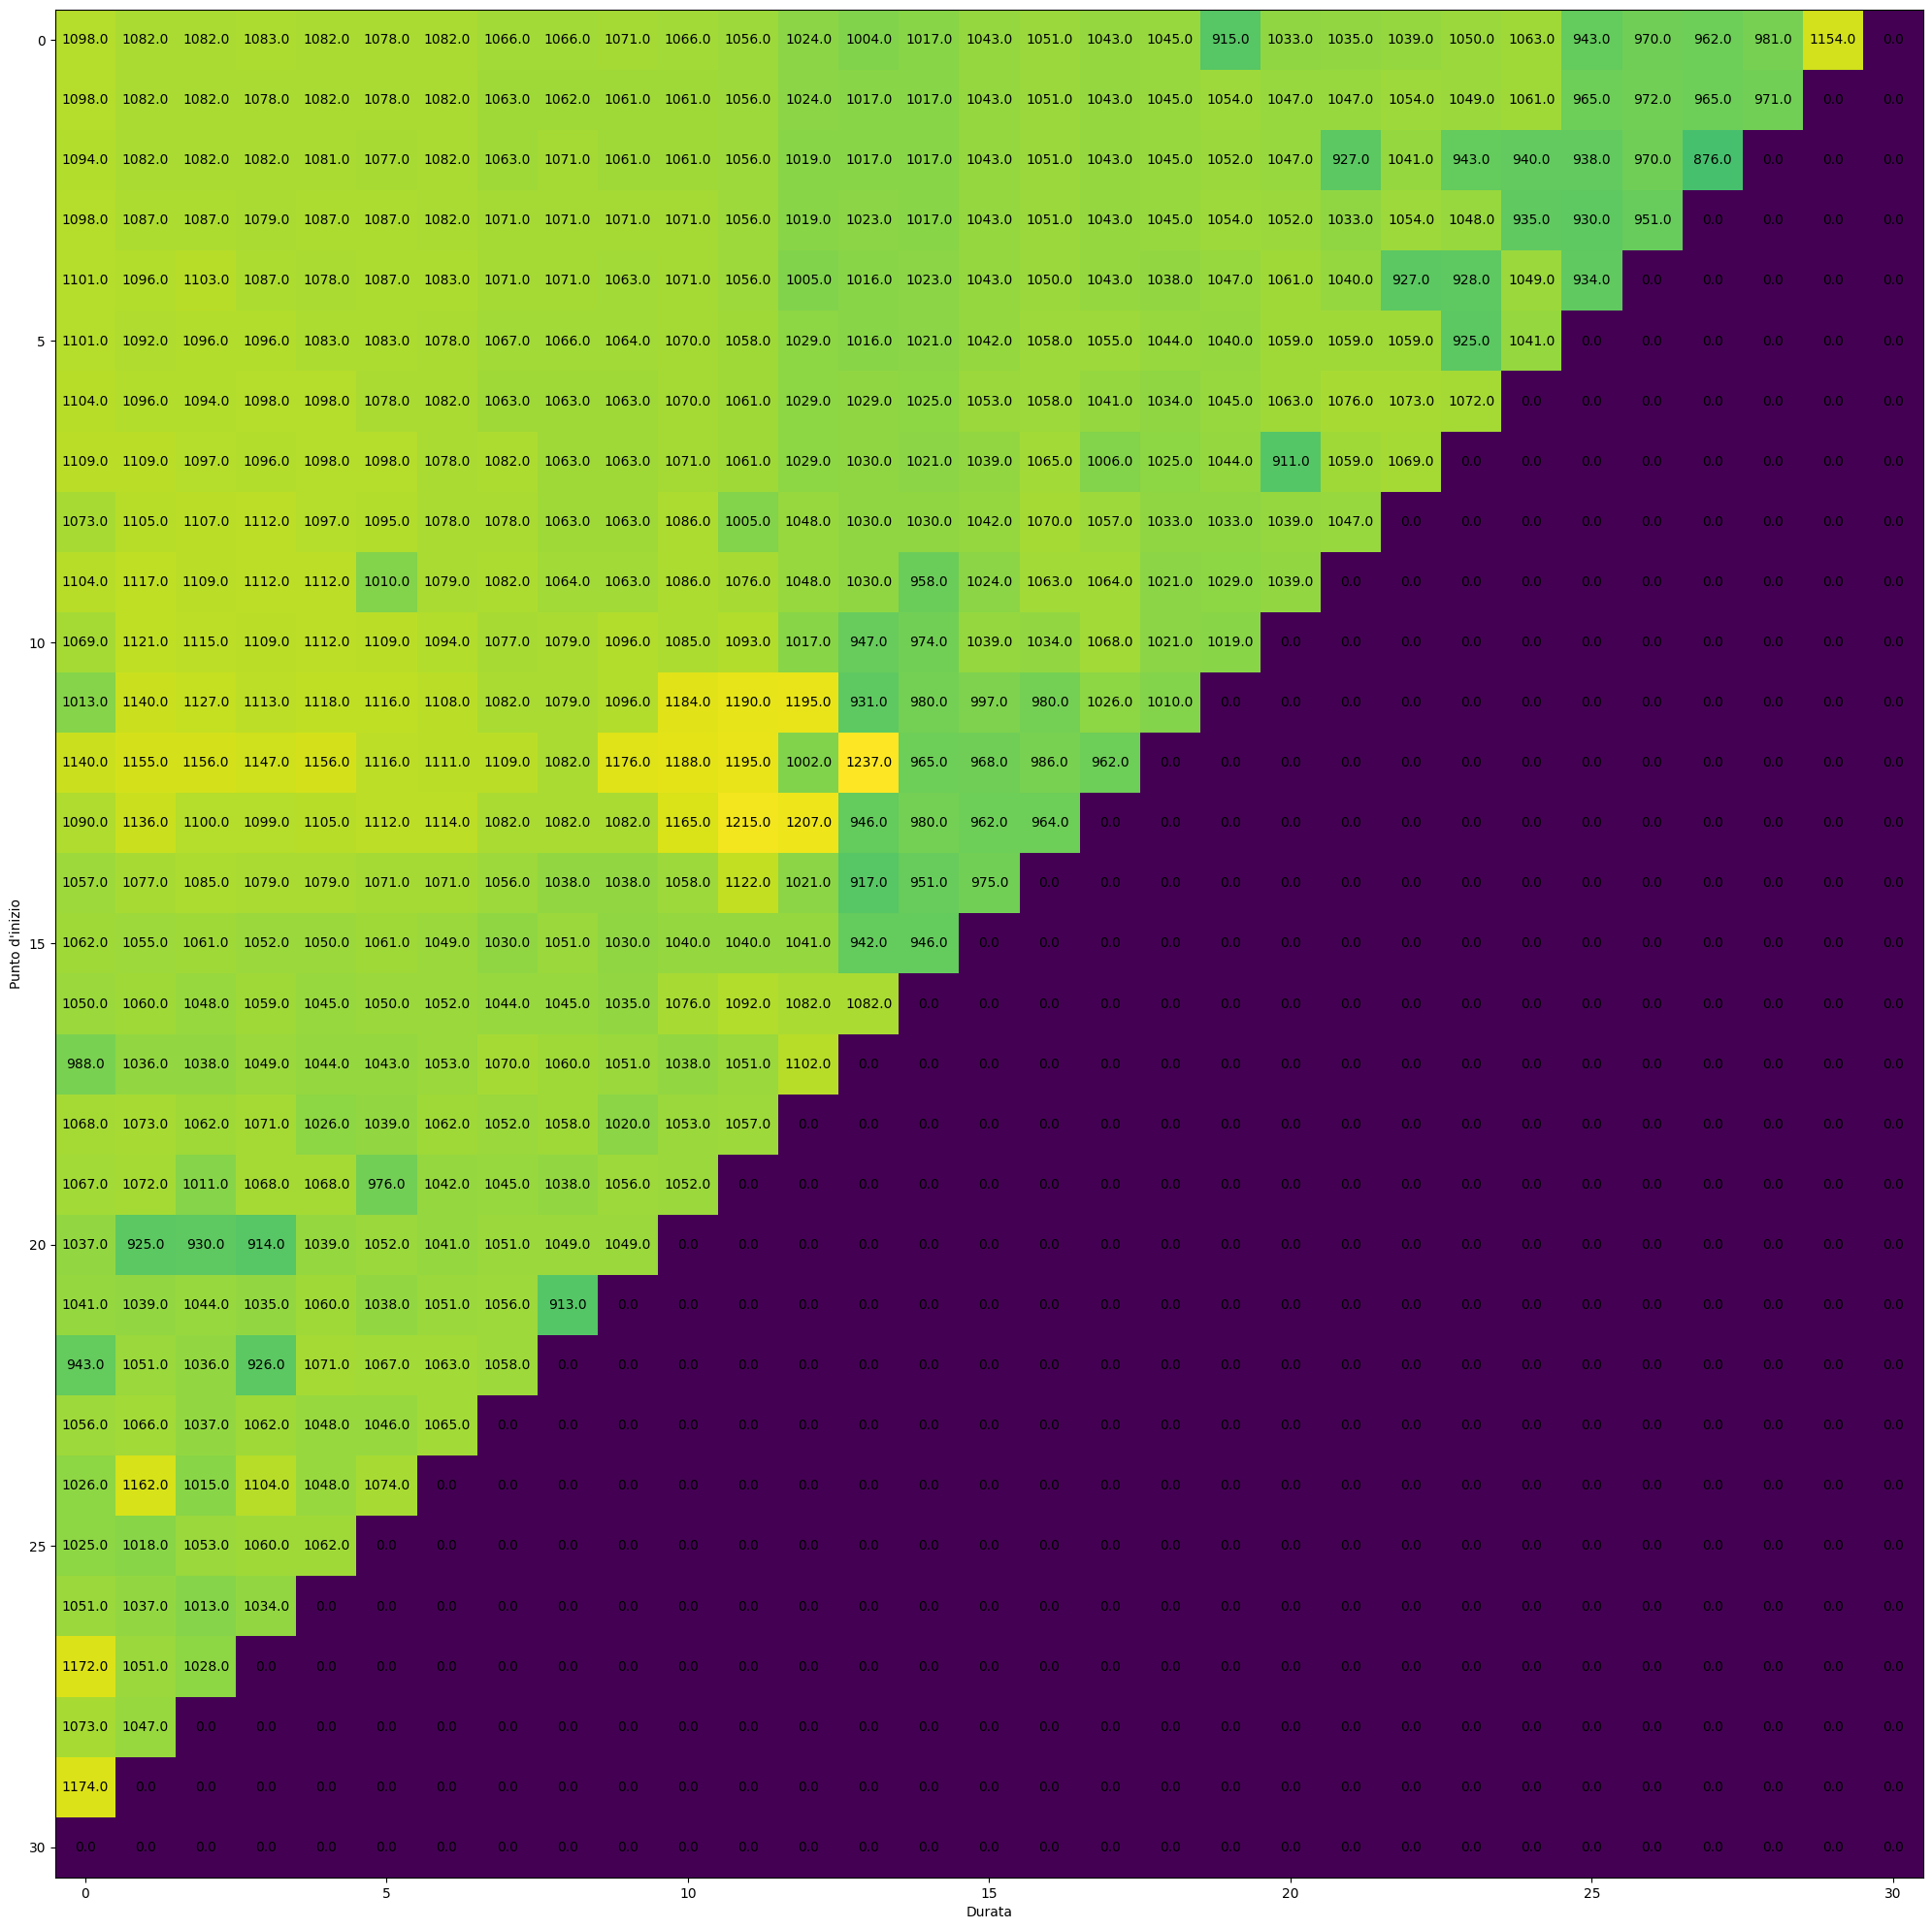

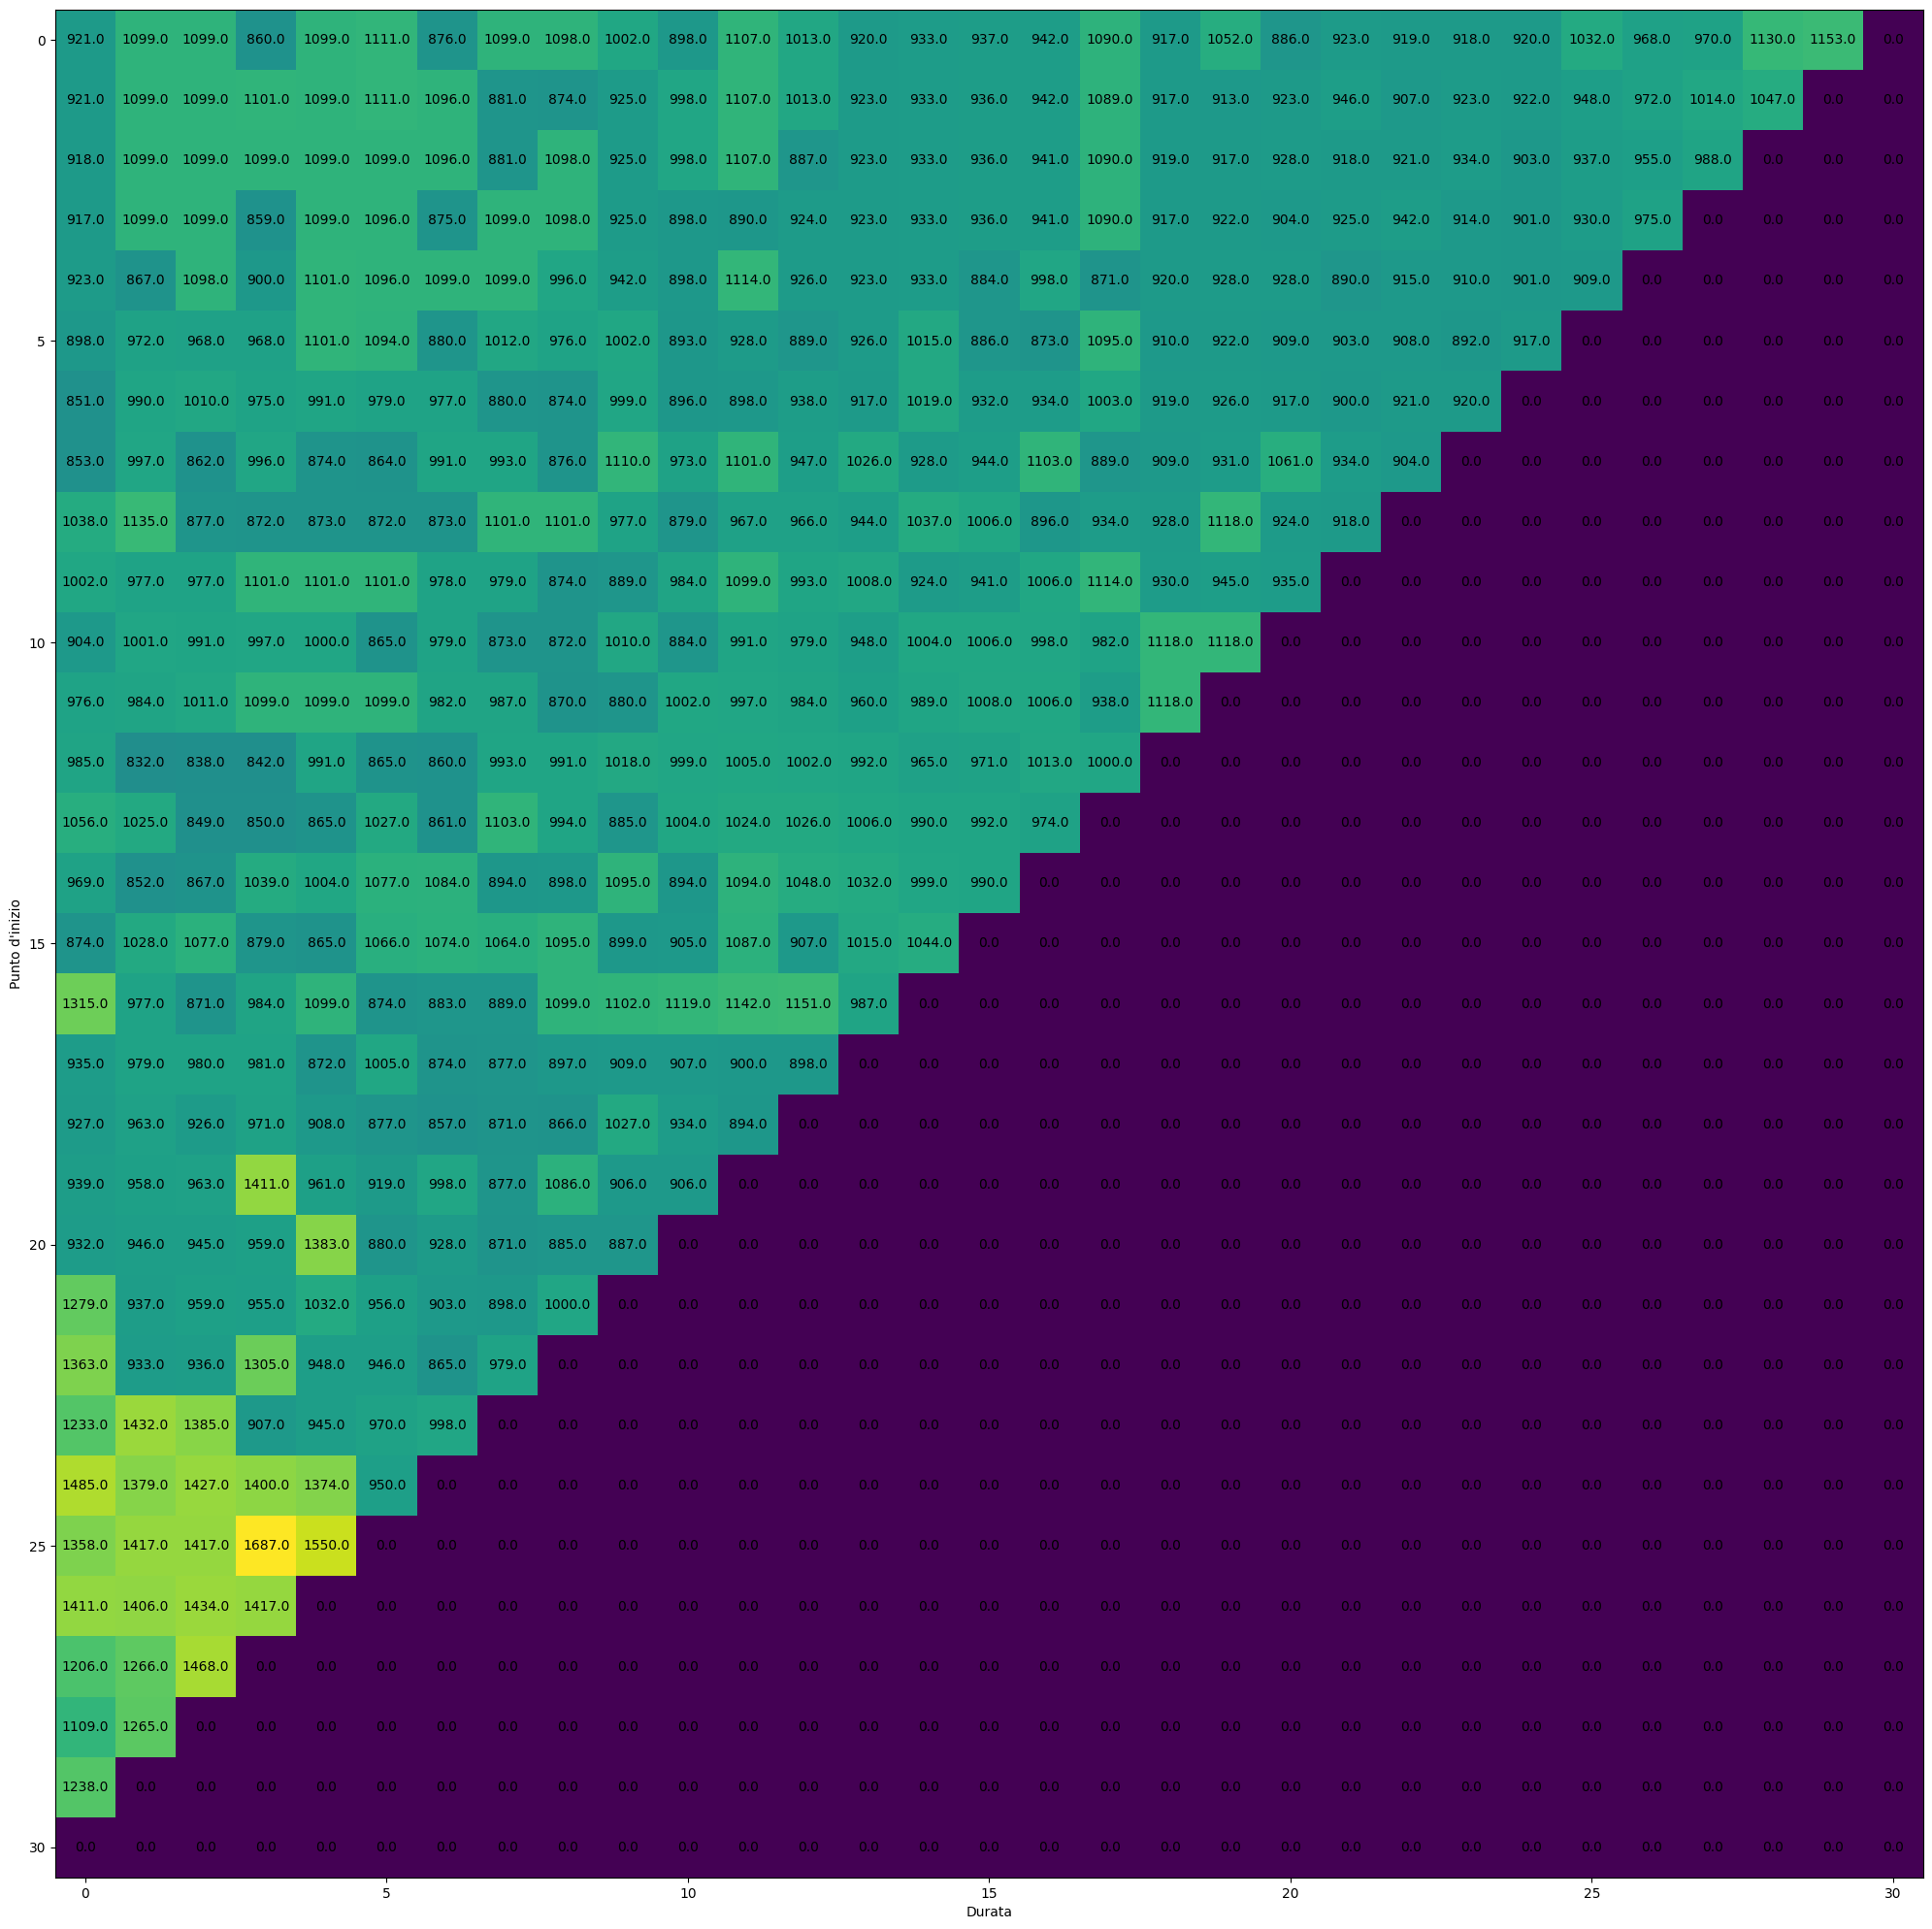

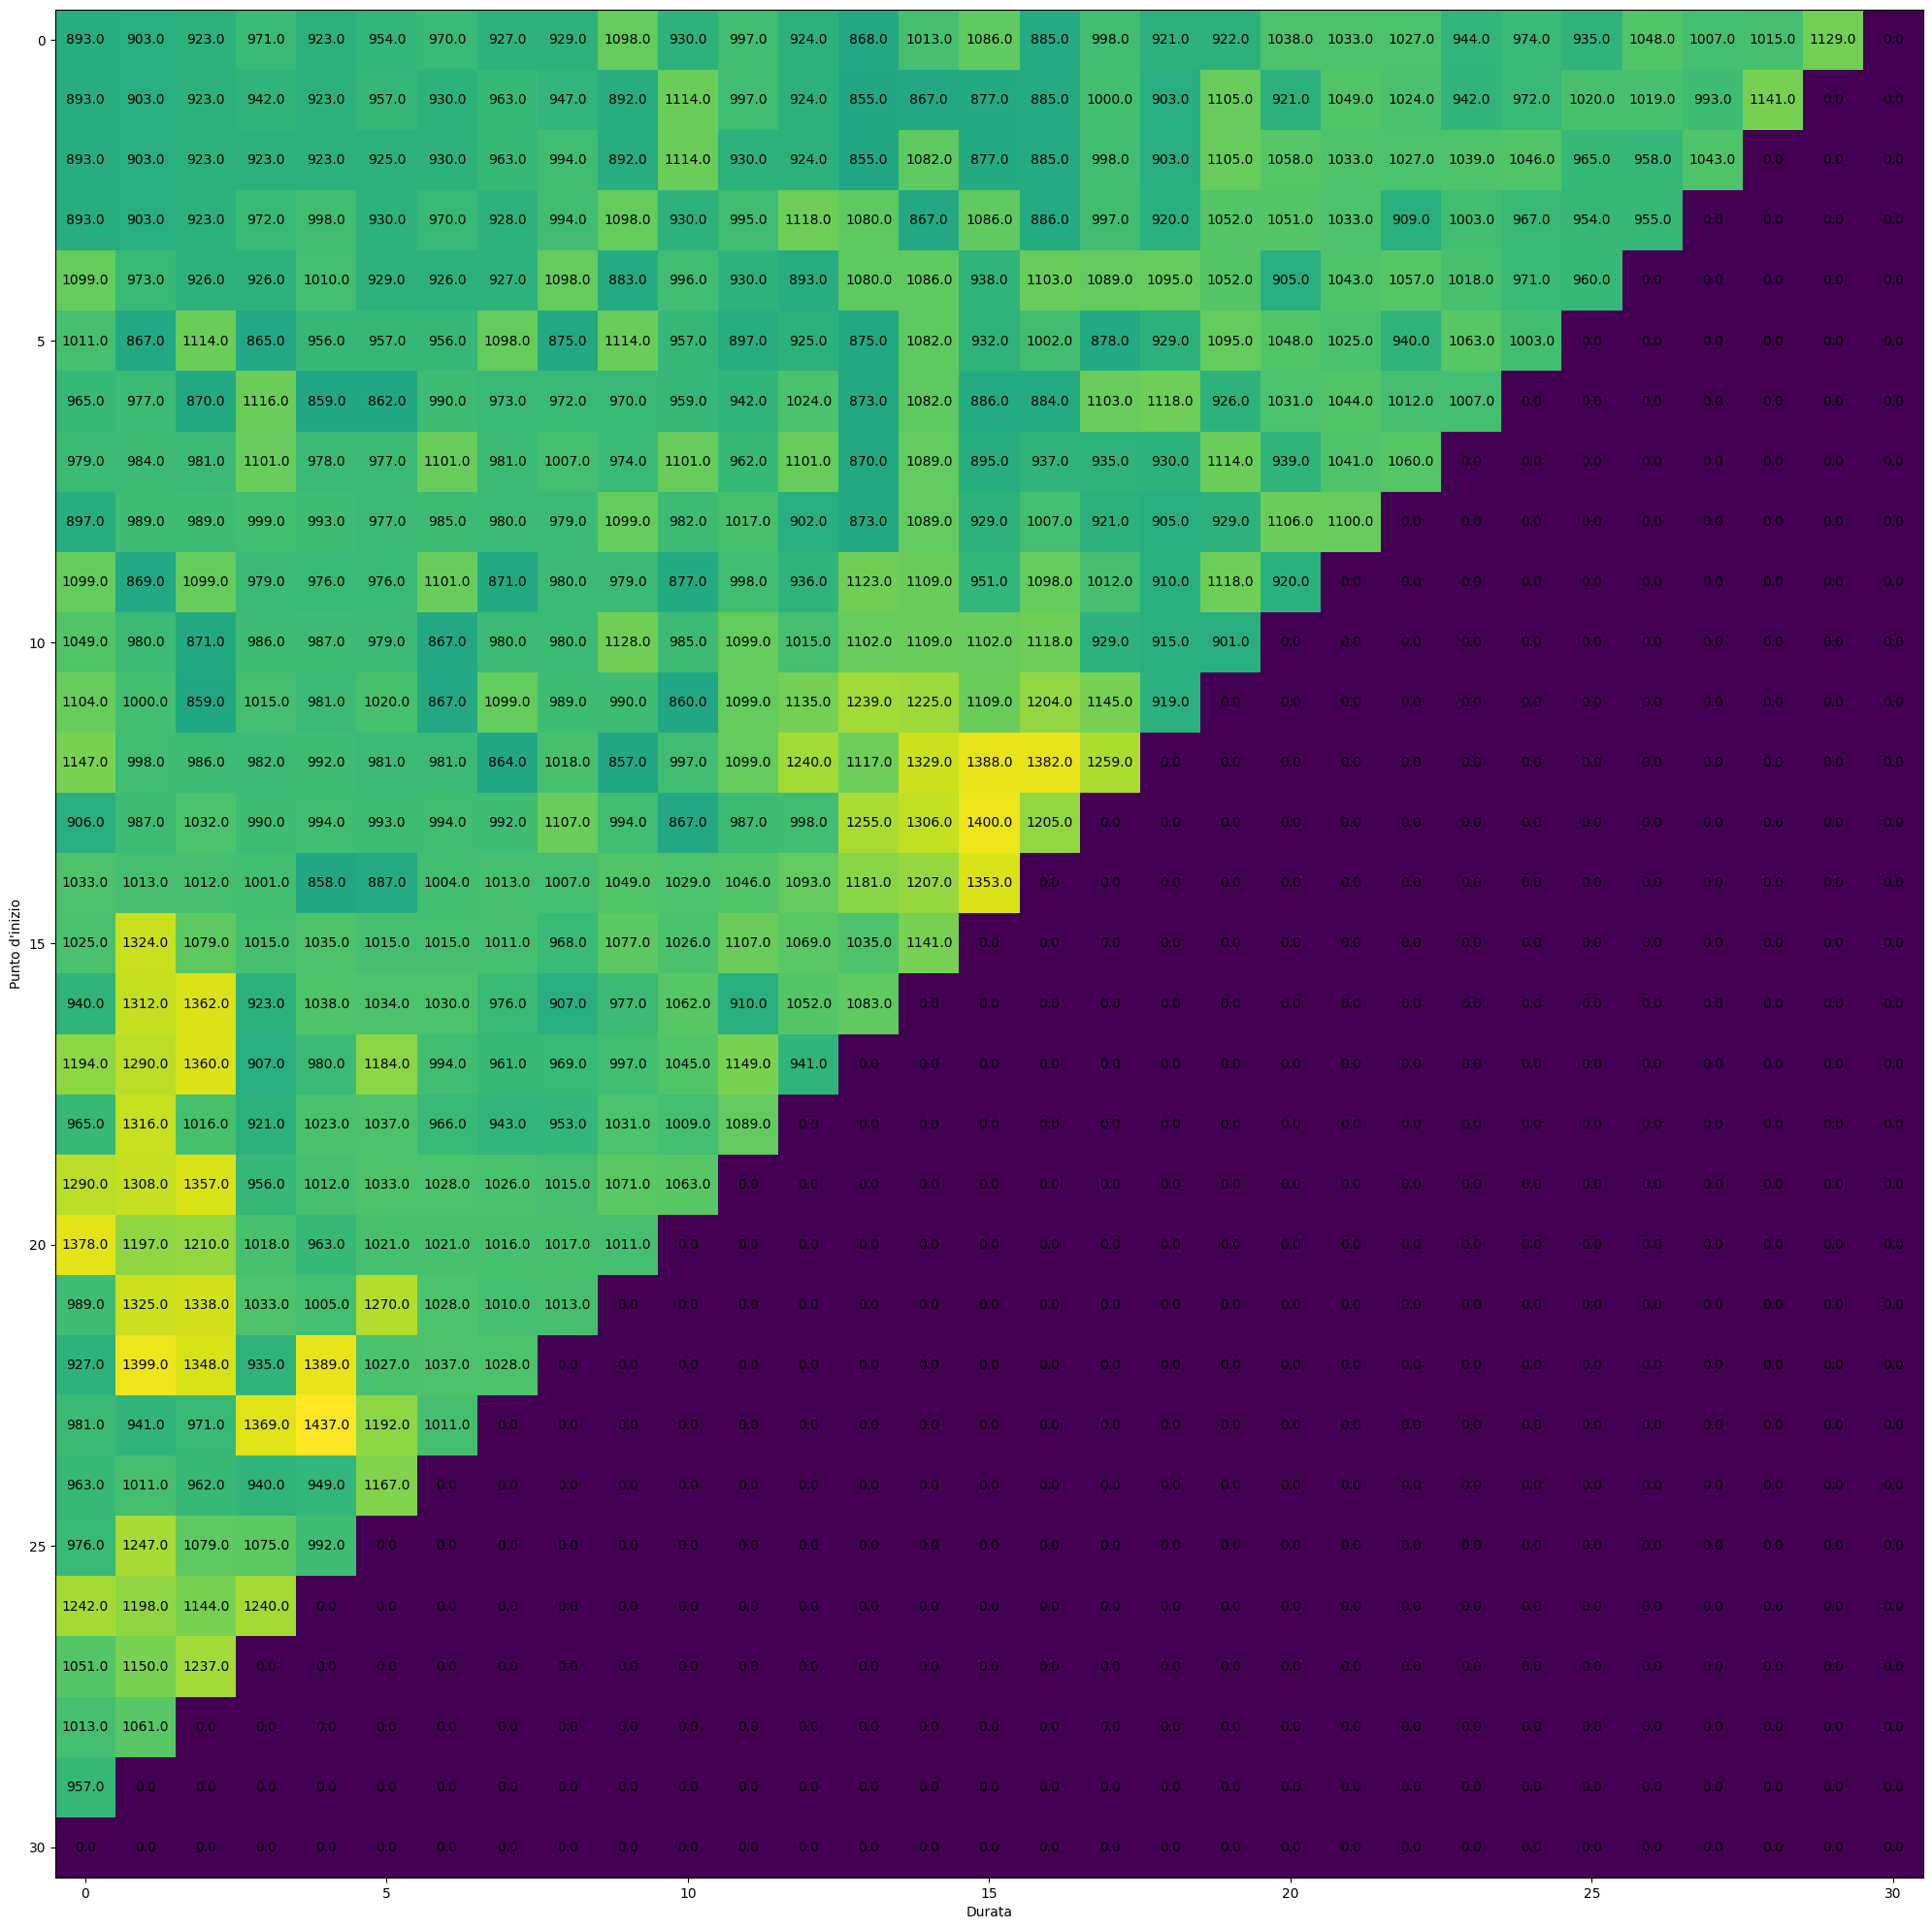

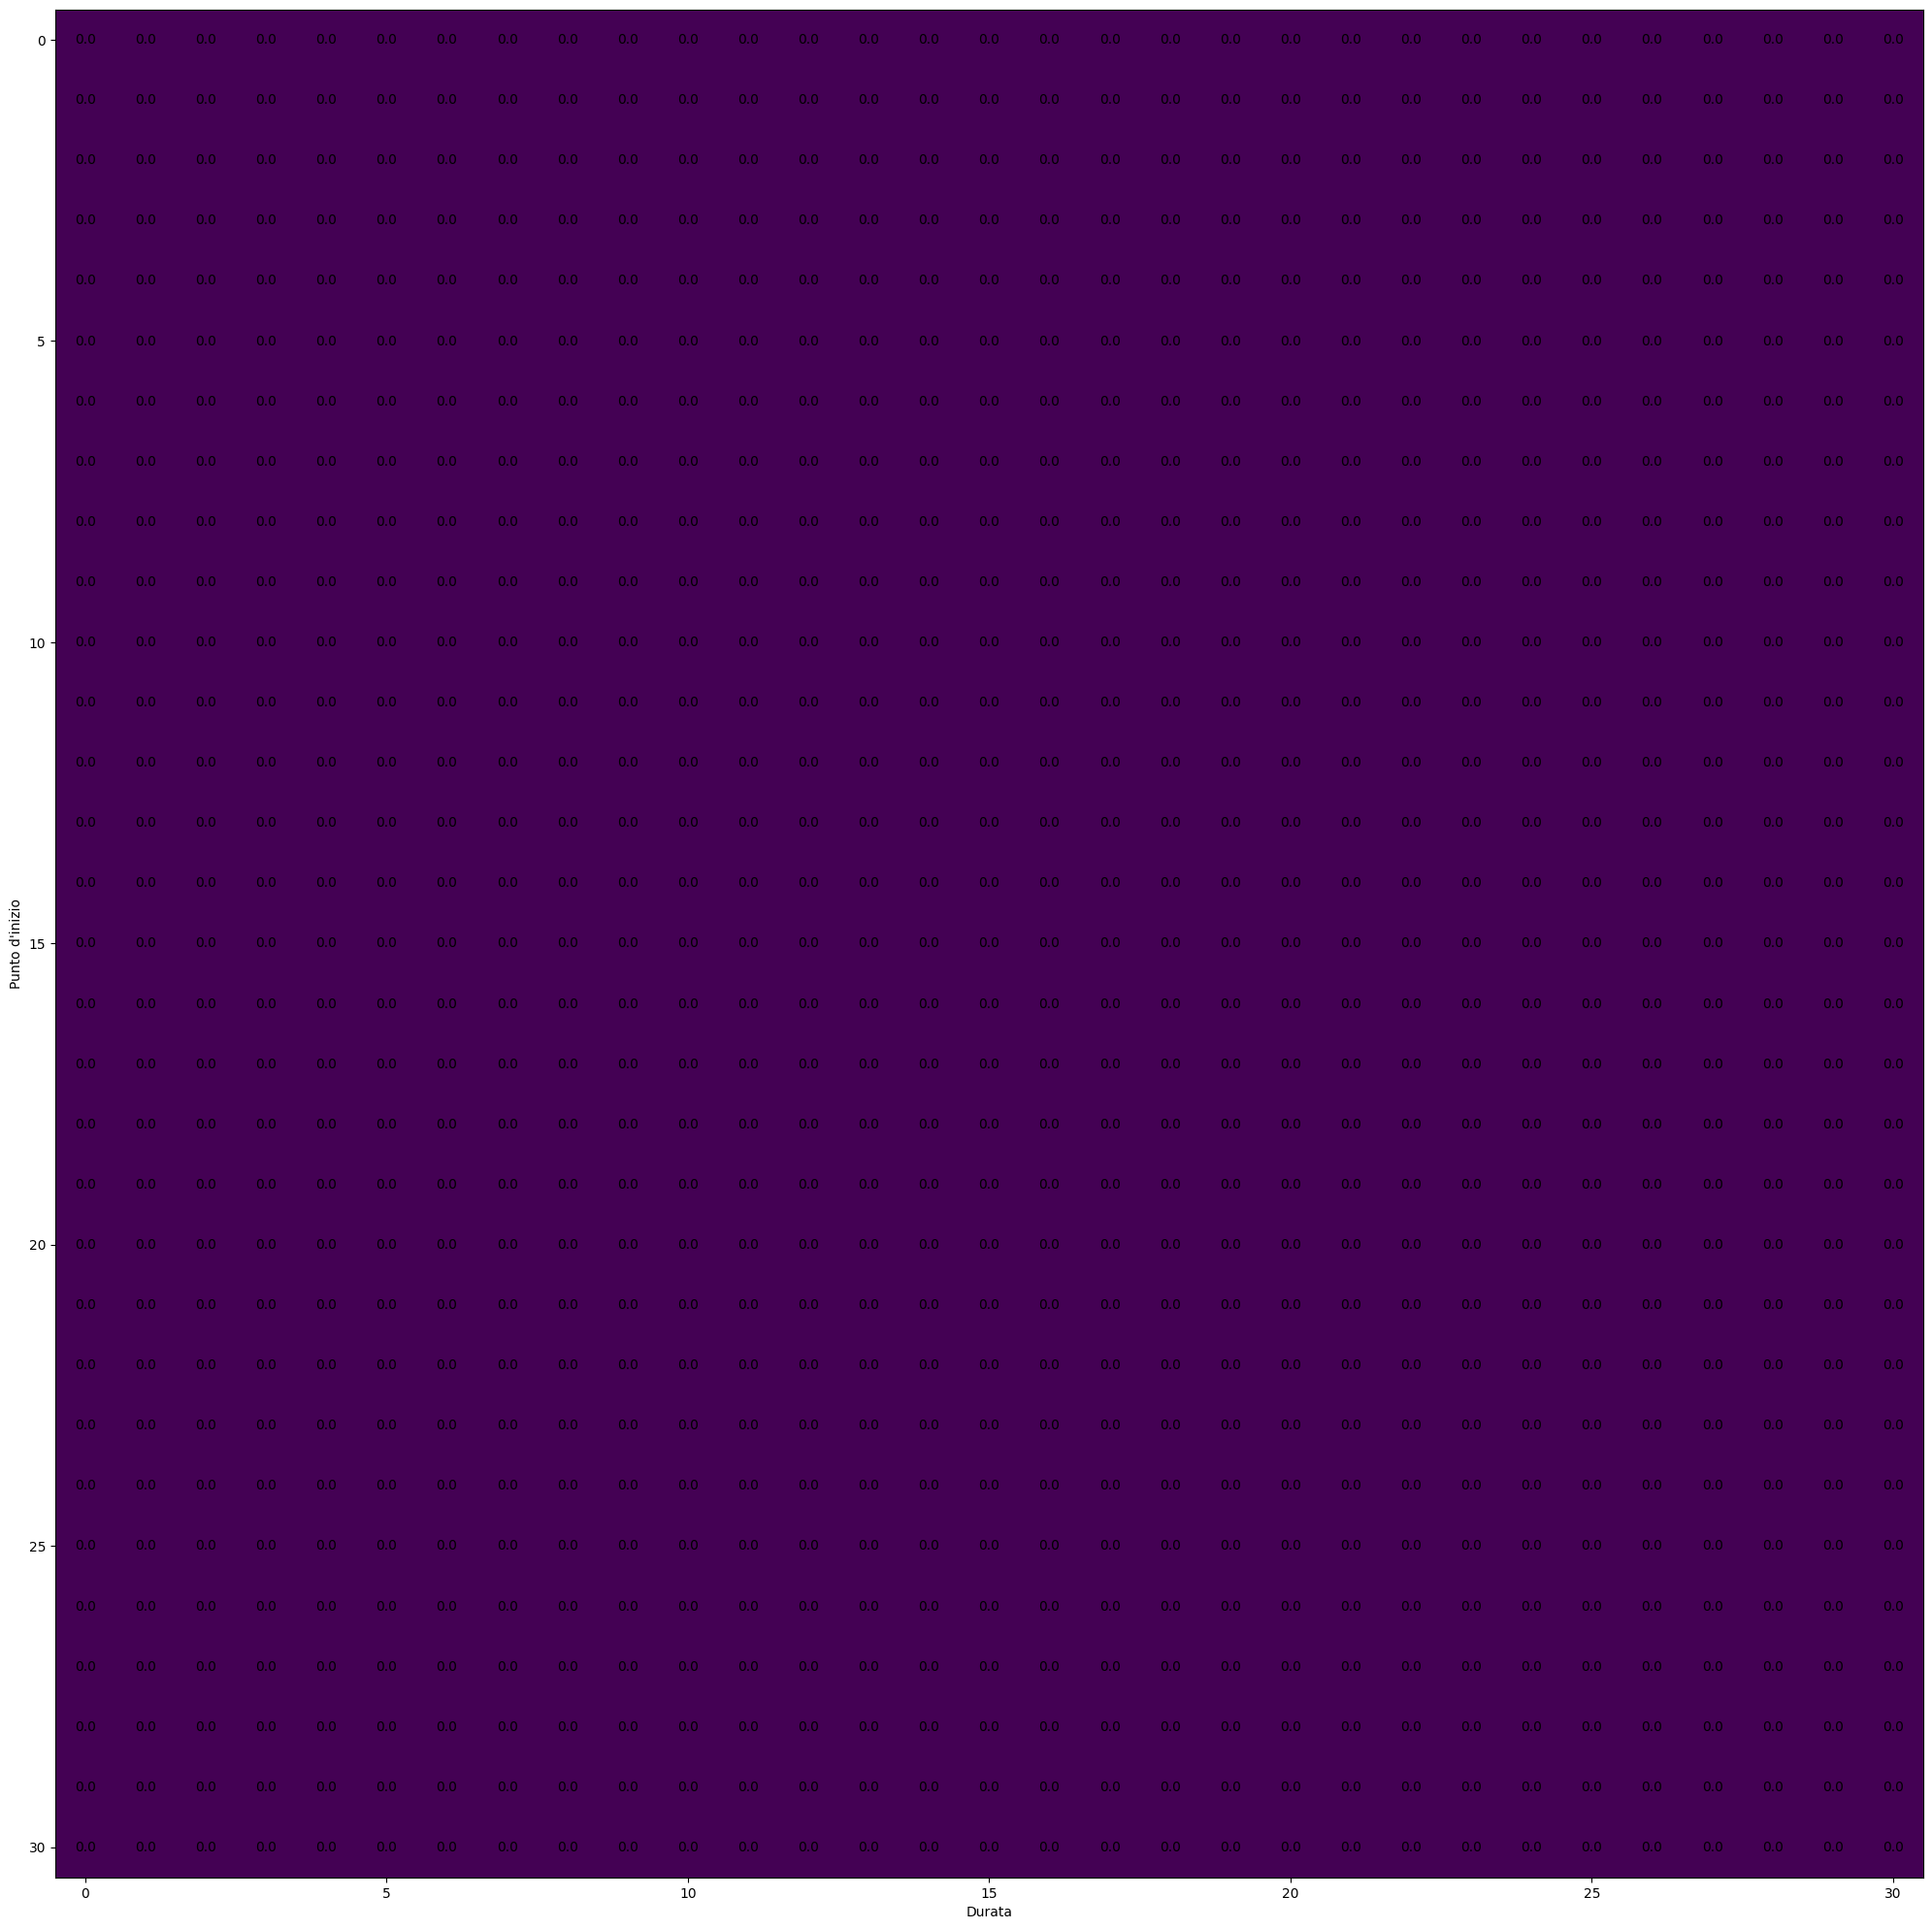

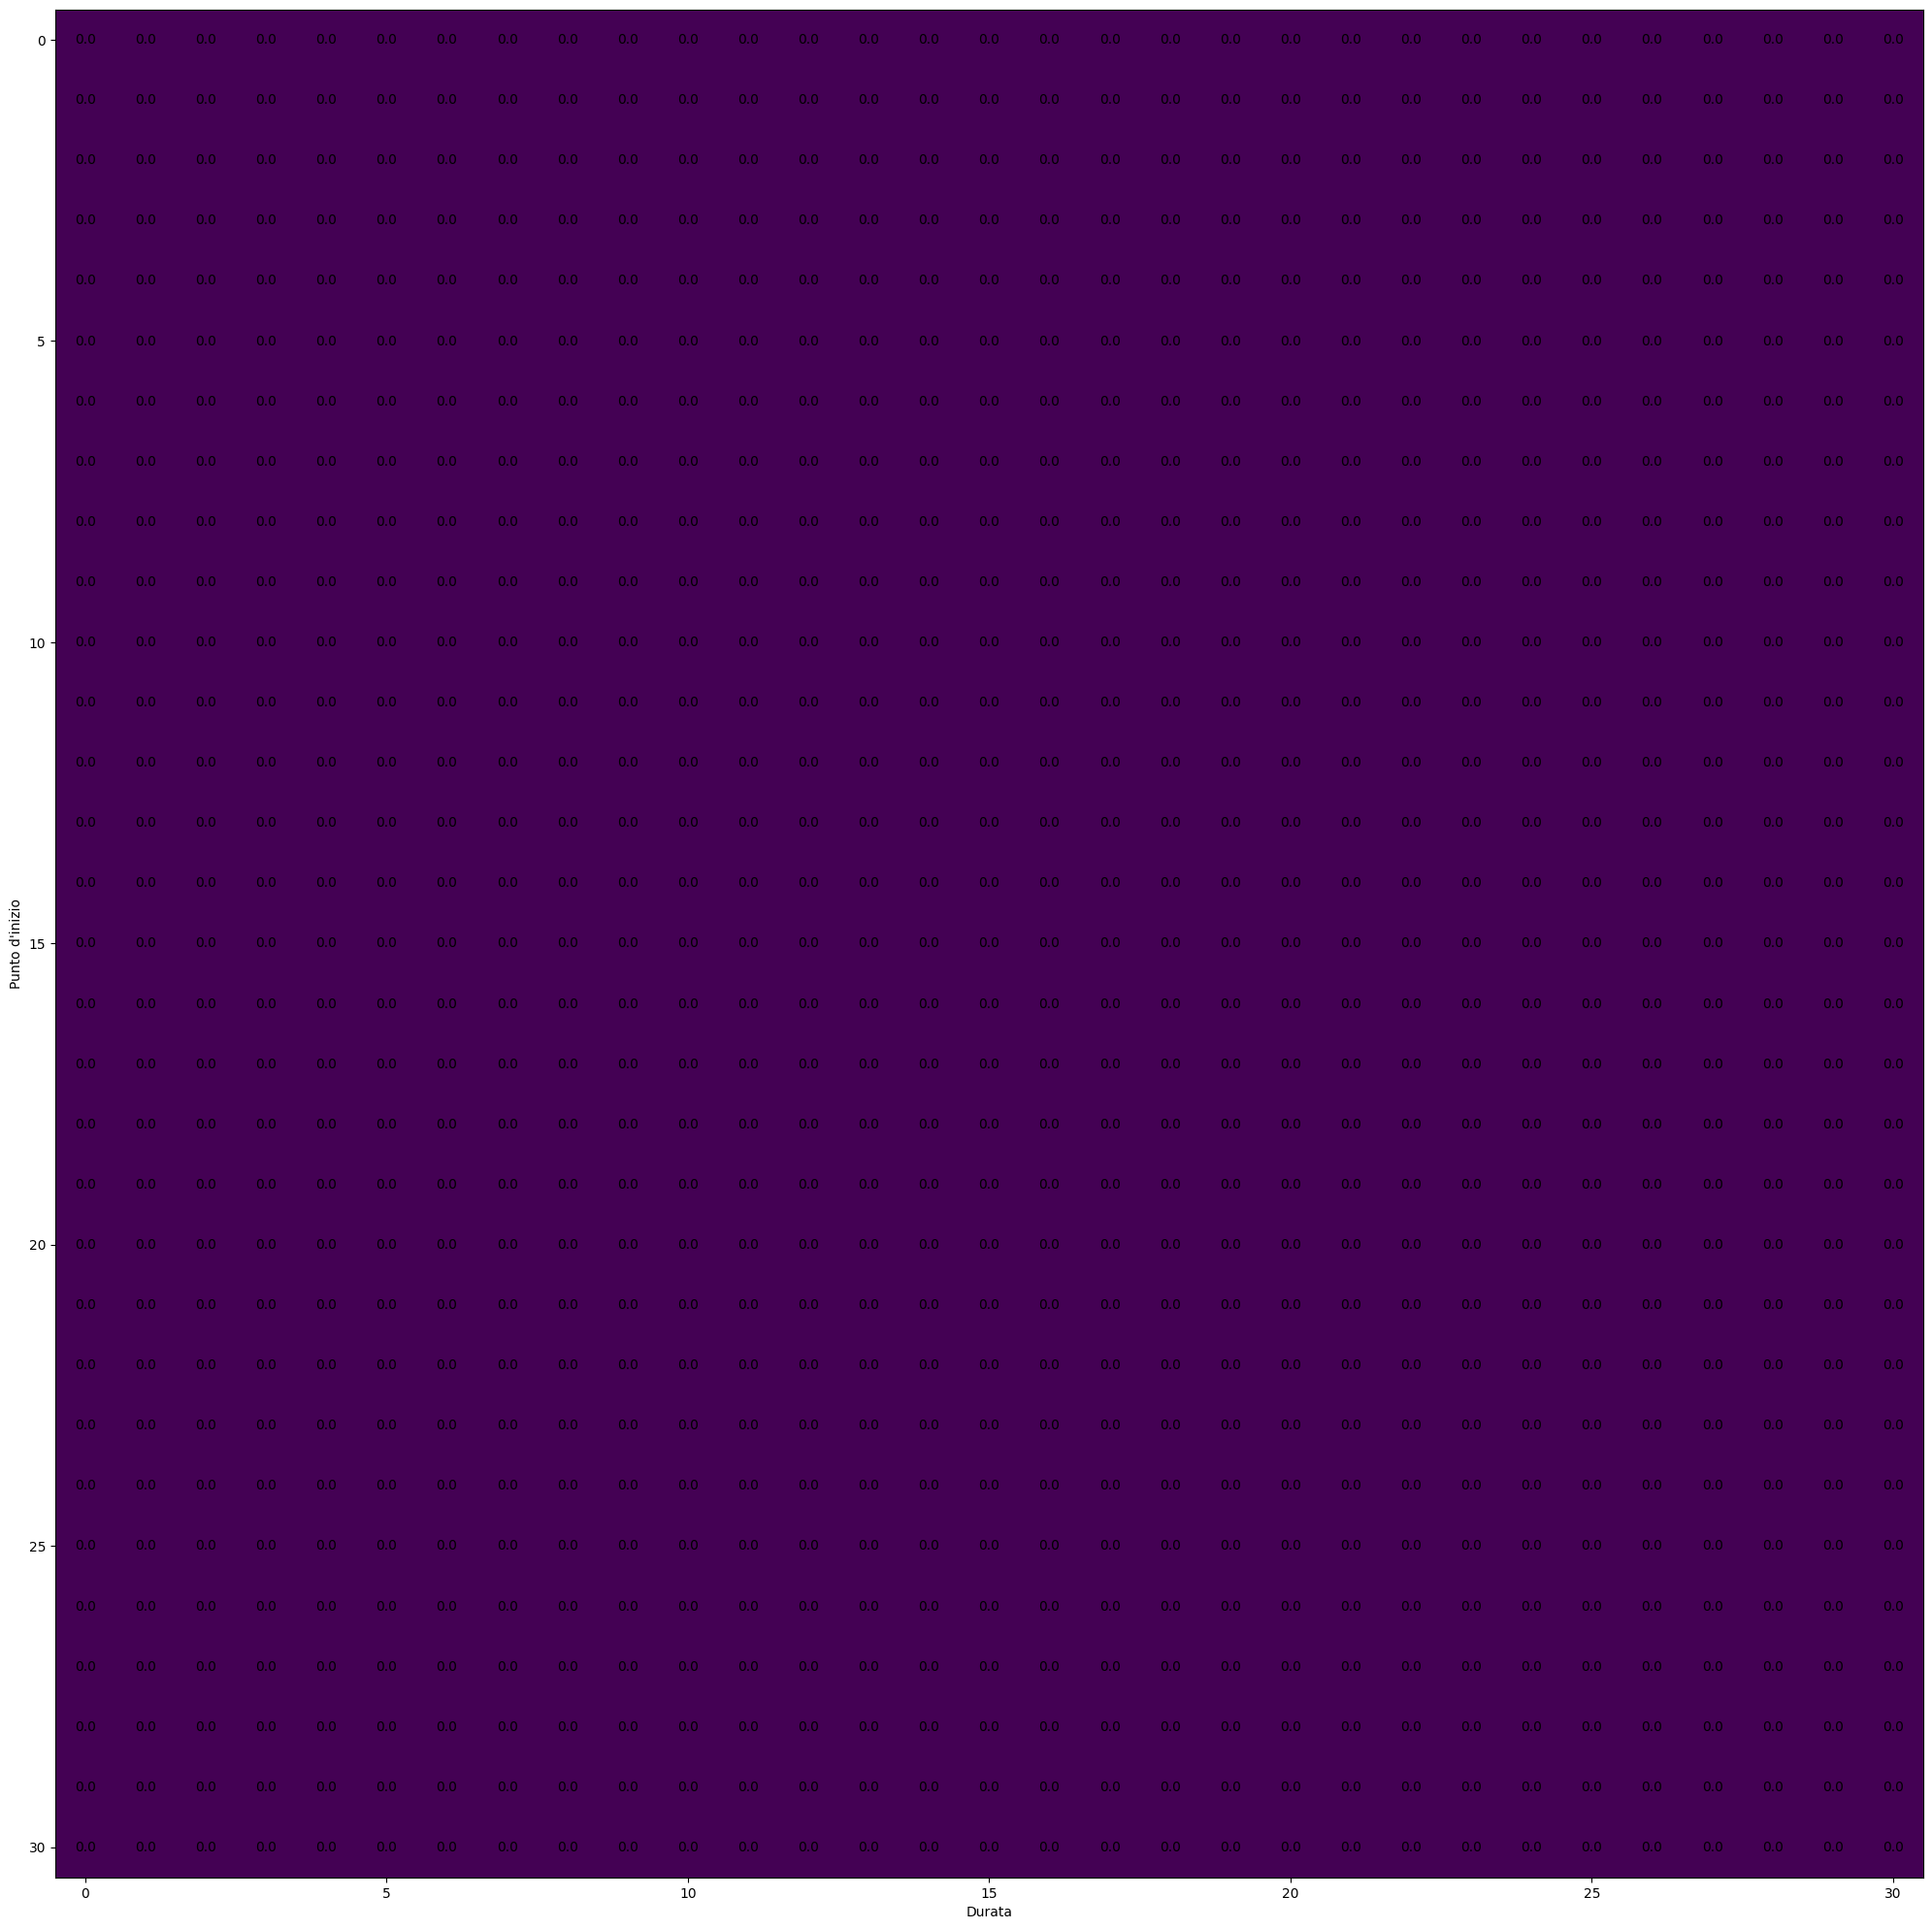

In [44]:
# Andiamo a stampare le deviazioni standard di tutti i cluster 

m_deviation = np.zeros([int(155/5),int(155/5),num_cluster])

for cluster,z in zip(cluster_deviation,range(0,num_cluster)):
    for a,x in zip(cluster,range(0,int(155/5))):
        for c,y in zip(a,range(0,len(a))):
            m_deviation[x,y,z] = c[0]

for p in range(0,num_cluster):
    
    fig, ax = plt.subplots()

    image = ax.imshow(m_deviation[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")

    fig.set_size_inches(25,25)
    for i in range(0,m_deviation.shape[0]):
        for j in range(0,m_deviation.shape[1]):
            c = np.round(m_deviation[i,j,p],decimals=0)
            ax.text(j, i, str(c), va='center', ha='center')

# Analisi della separazione con somma delle distanze tra un i punti di un cluster e tutti gli altri

In [45]:
# Altra metrica di separazione 

sum_separation = []

for a,s in zip(kmeans_total,newSeries_total):
    sum_separation.append([])
    for y_pred,new_series in zip(a,s):
        rese_c1 = newResa3[y_pred == 0]
        rese_c2 = newResa3[y_pred == 1]
        rese_c3 = newResa3[y_pred == 2]

        rese = [rese_c1,rese_c2,rese_c3]
        sum_separation[-1].append([])
        for a,i in zip(rese,range(0,3)):
            sum = 0
            sum_separation[-1][-1].append([])
            for b,j in zip(rese,range(0,3)):
                if(i == j):
                    continue
                for c in a:
                    for d in b:
                        sum += abs(c-d)
            sum_separation[-1][-1][-1] = ((sum/(len(newResa3)-len(a))))/len(a)
        

IndexError: index 3 is out of bounds for axis 2 with size 3

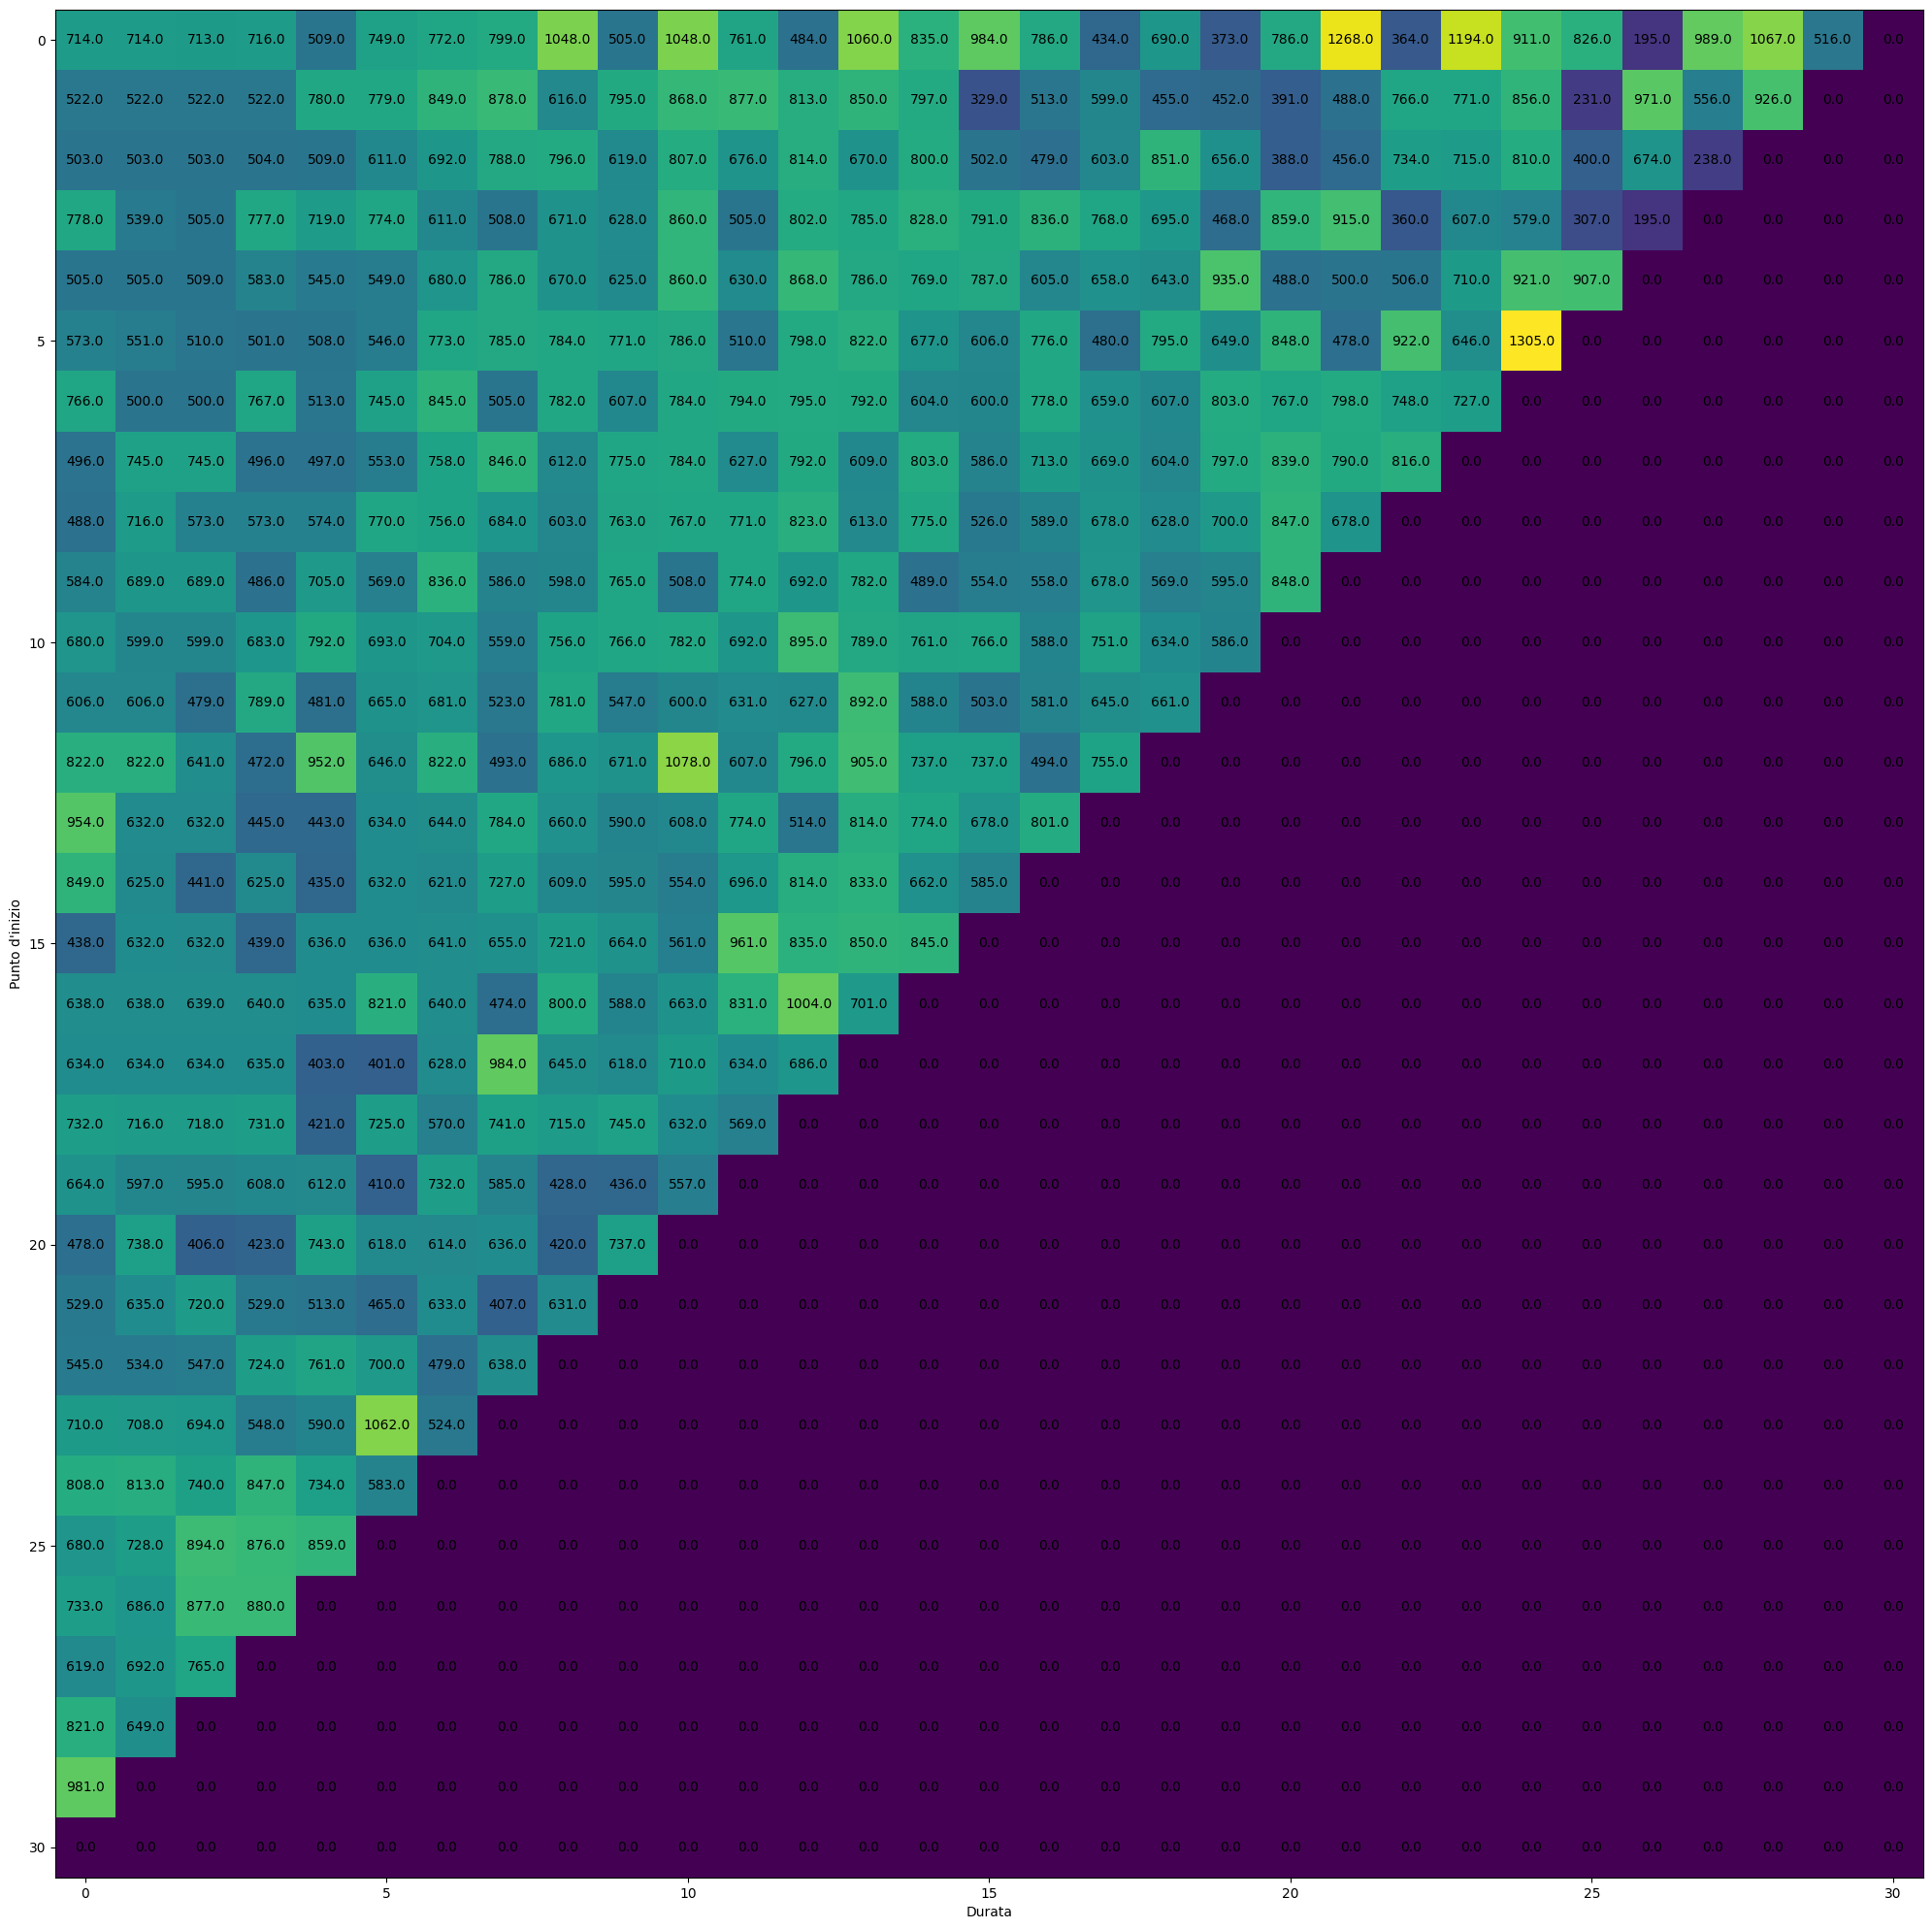

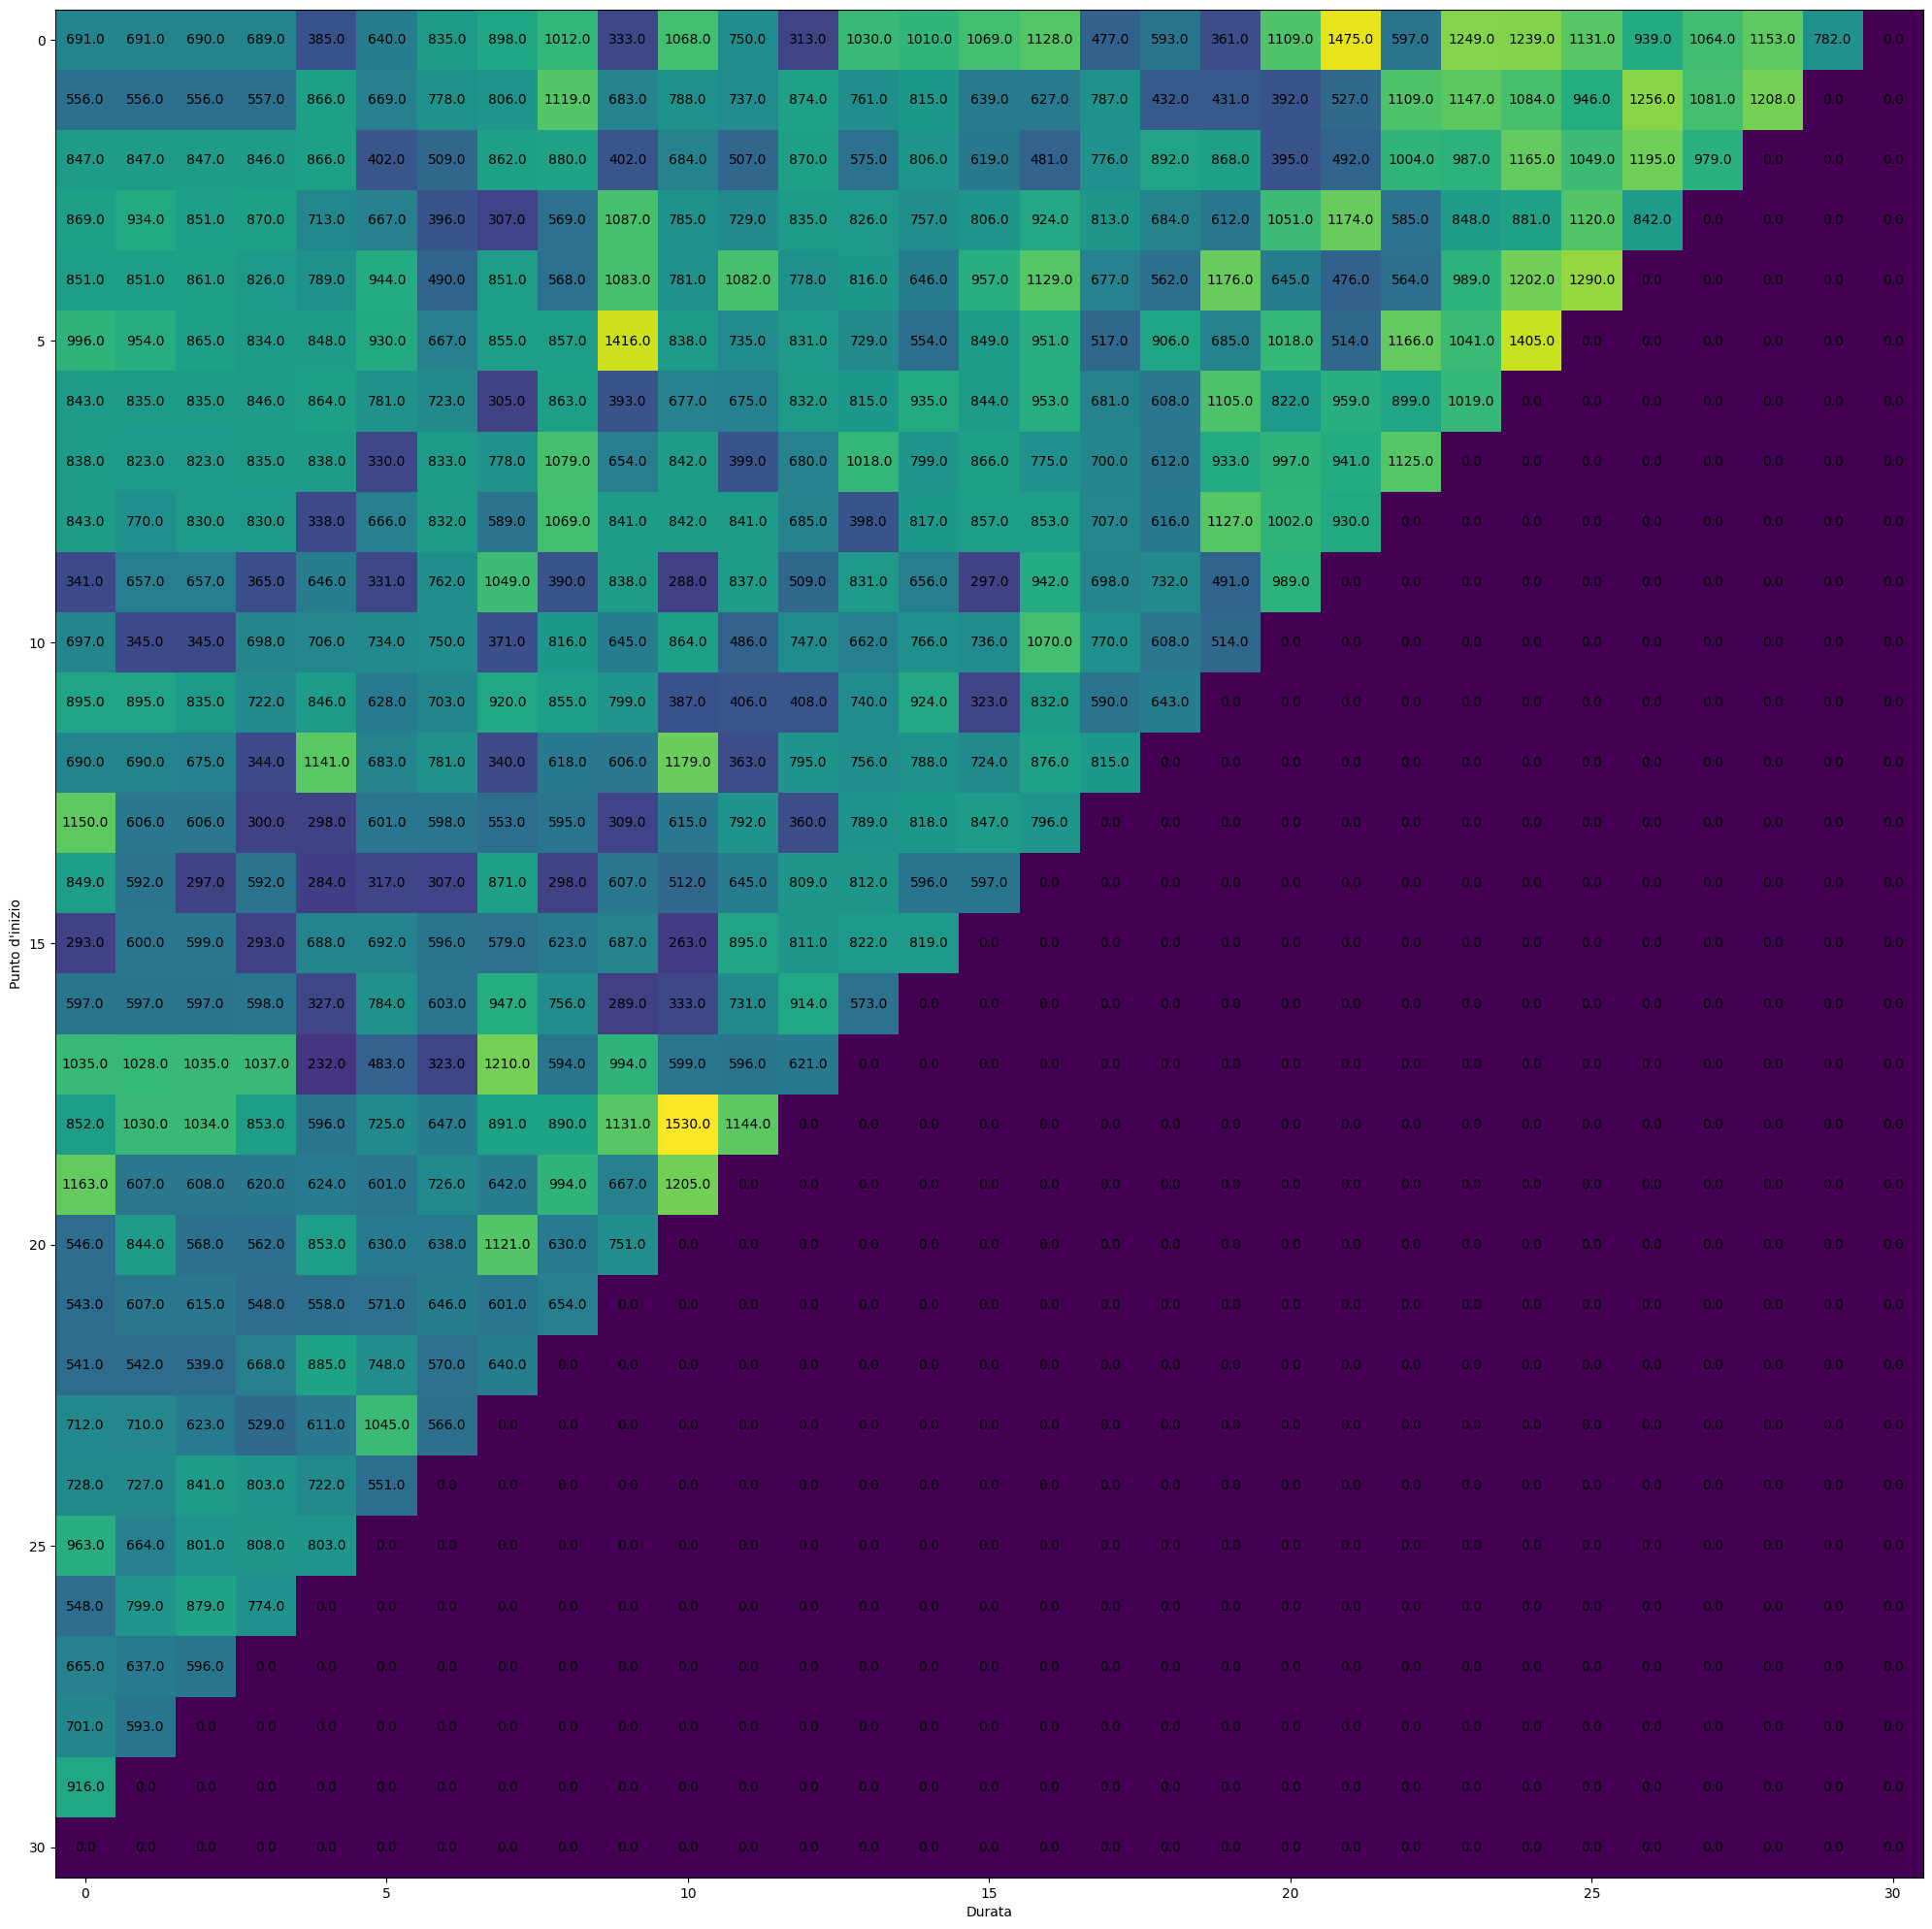

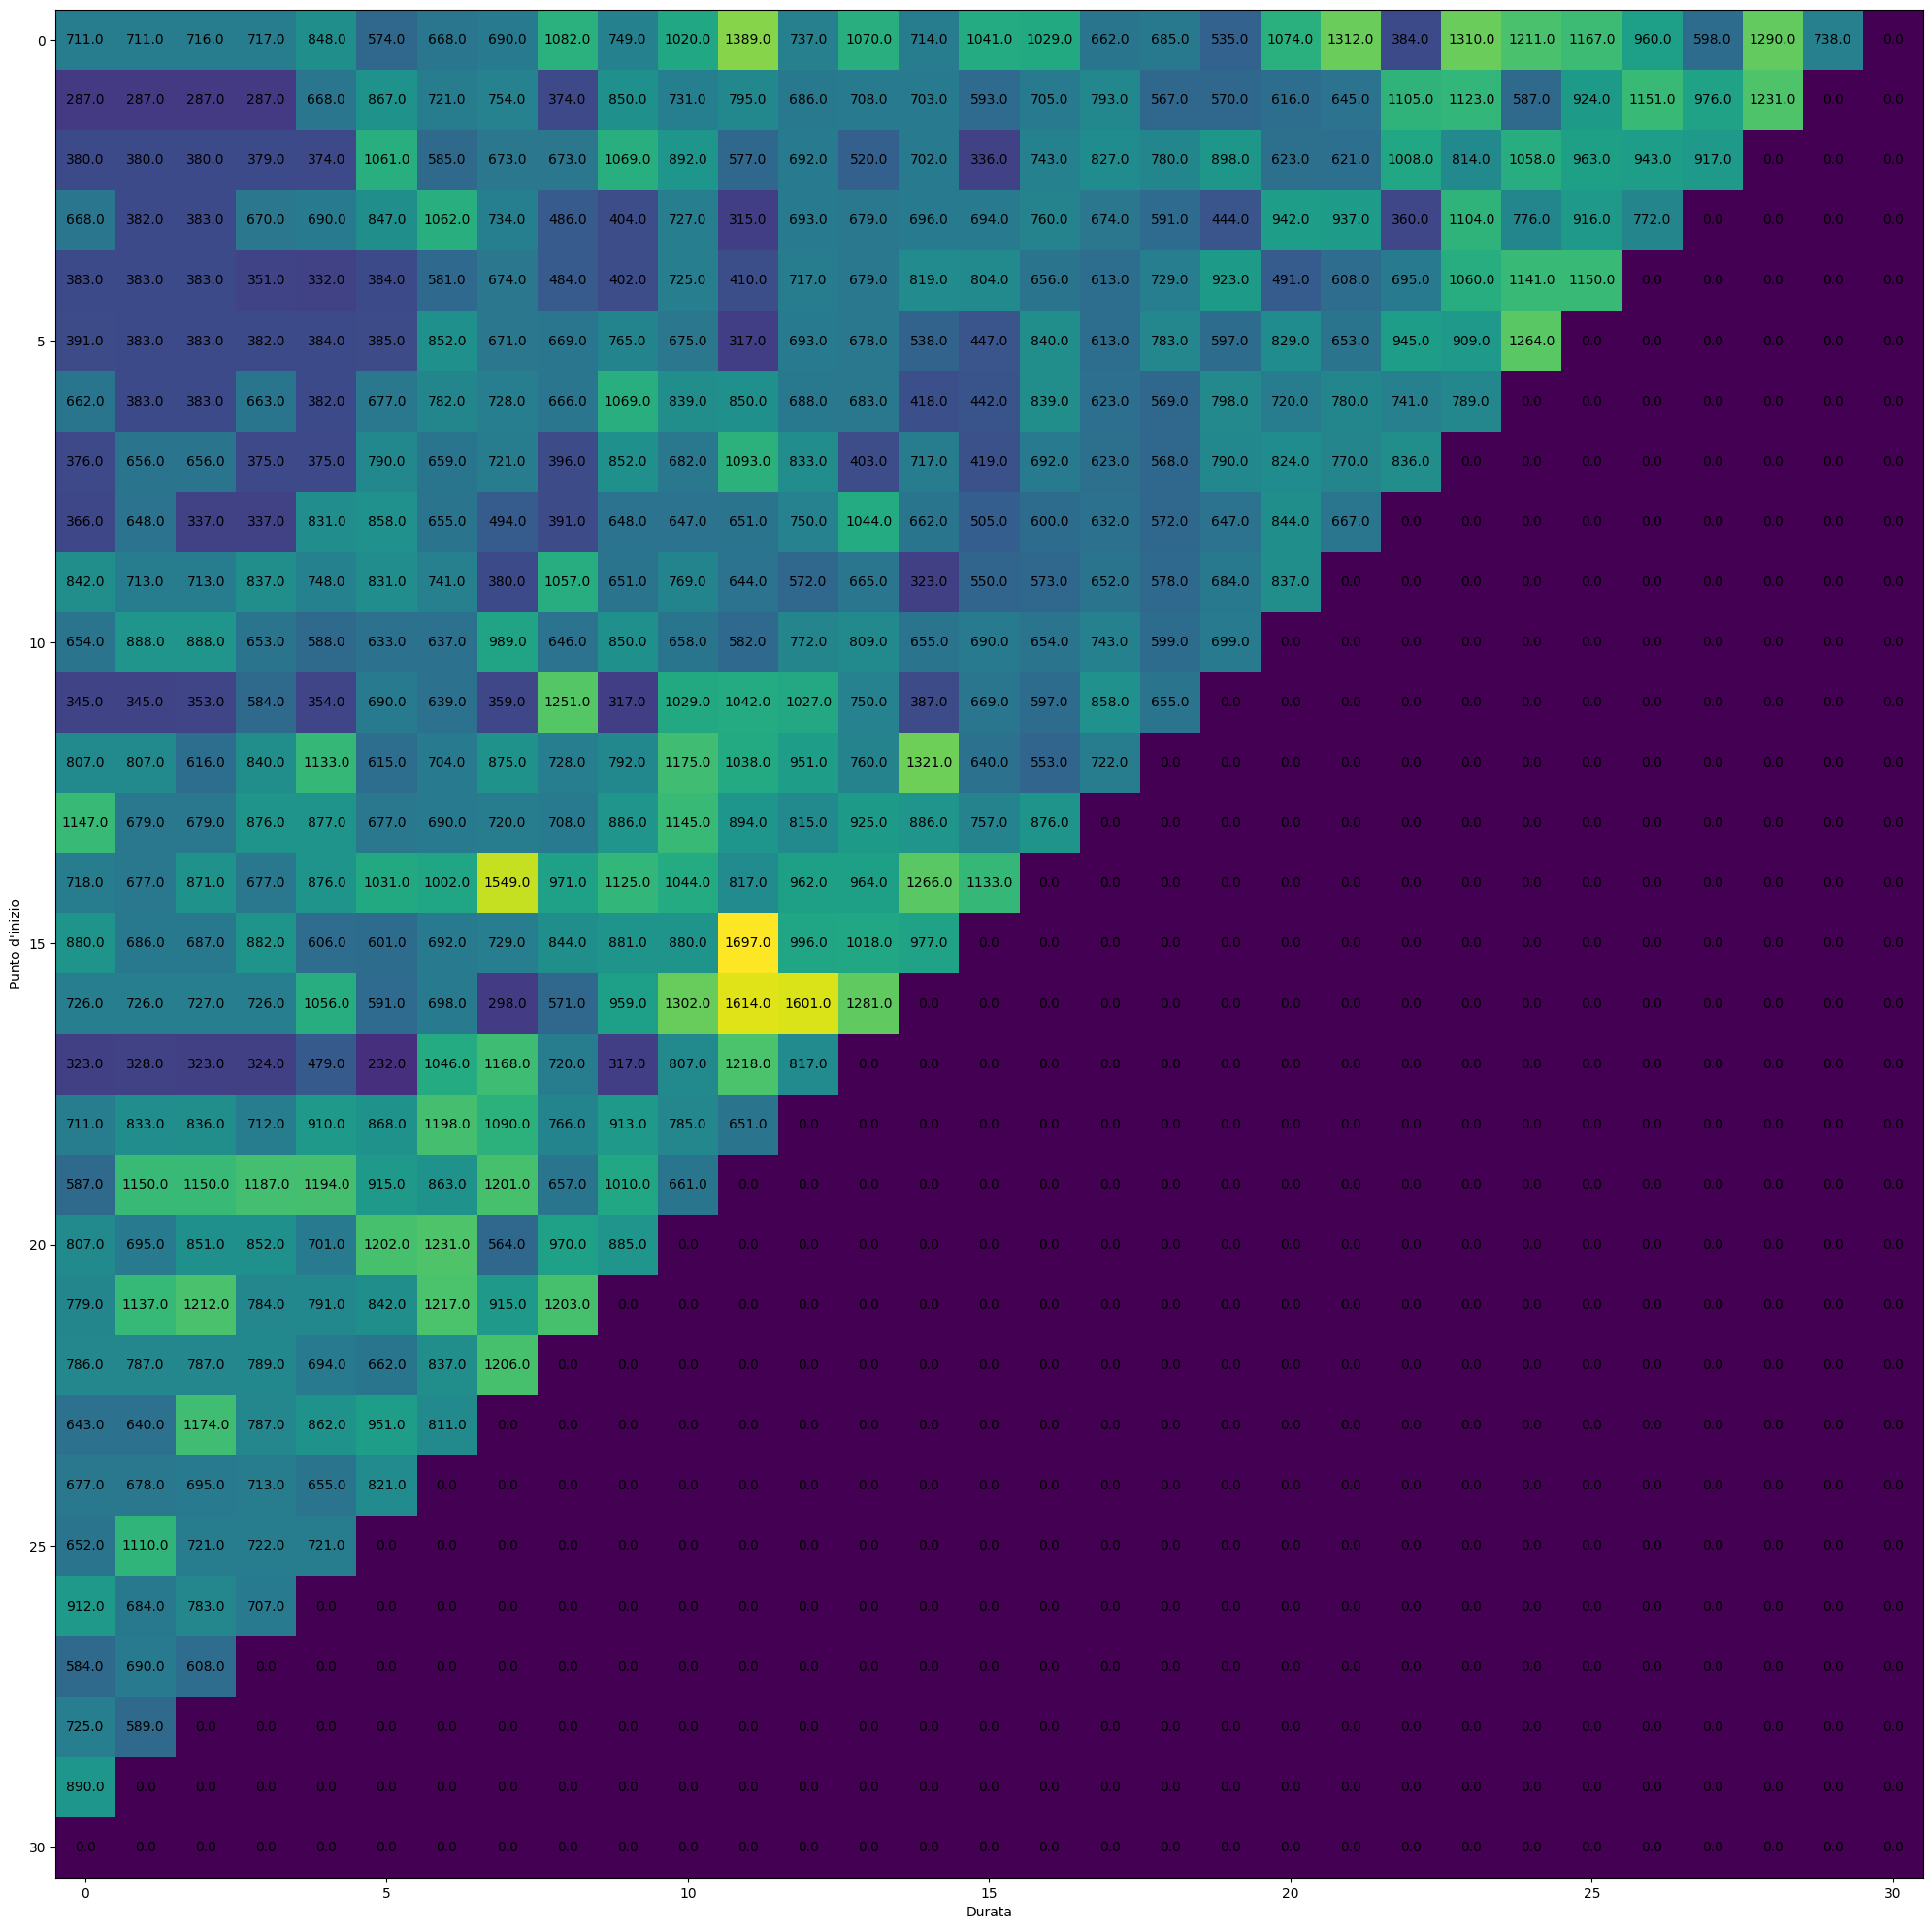

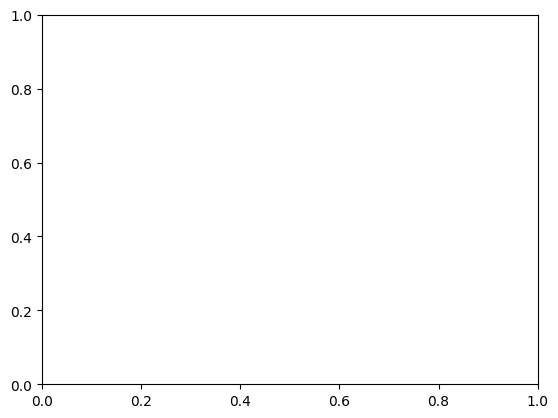

In [46]:

m_sum_sep = np.zeros([int(155/5),int(155/5),3])

for cluster,y in zip(sum_separation,range(0,int(155/5))):
    
    for a,x in zip(cluster,range(0,len(cluster))):
        m_sum_sep[x,y] = a


for p in range(0,num_cluster):
    fig, ax = plt.subplots()

    image = ax.imshow(m_sum_sep[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")

    fig.set_size_inches(25,25)
    for i in range(0,m_sum_sep.shape[0]):
        for j in range(0,m_sum_sep.shape[1]):
            c = np.round(m_sum_sep[i,j,p],decimals=0)
            ax.text(j, i, str(c), va='center', ha='center')

# Calcolo della separazione usando la media della distanza dei centroidi

In [ ]:

separation = []

result_sepa = []

for a,s in zip(kmeans_total,newSeries_total):
    separation.append([])
    result_sepa.append([])
    for y_pred,new_series in zip(a,s):
        rese_c1 = newResa3[y_pred == 0]
        rese_c2 = newResa3[y_pred == 1]
        rese_c3 = newResa3[y_pred == 2]

        rese = [rese_c1,rese_c2,rese_c3]
        meanValue = []

        for resa in rese:
            meanValue.append(np.mean(resa))
        separation[-1].append([])
        for a,i in zip(meanValue,range(0,num_cluster)):
            
            for b,j in zip(meanValue,range(0,num_cluster)):
                if( i >= j):
                    continue
                else:
                    separation[-1][-1].append(abs(a-b))
            


In [ ]:
m_separation = np.zeros([int(155/5),int(155/5),3])

for cluster,y in zip(separation,range(0,int(155/5))):
    
    for a,x in zip(cluster,range(0,len(cluster))):
        for c,z in zip(a,range(0,num_cluster)):
            m_separation[x,y,z] = c

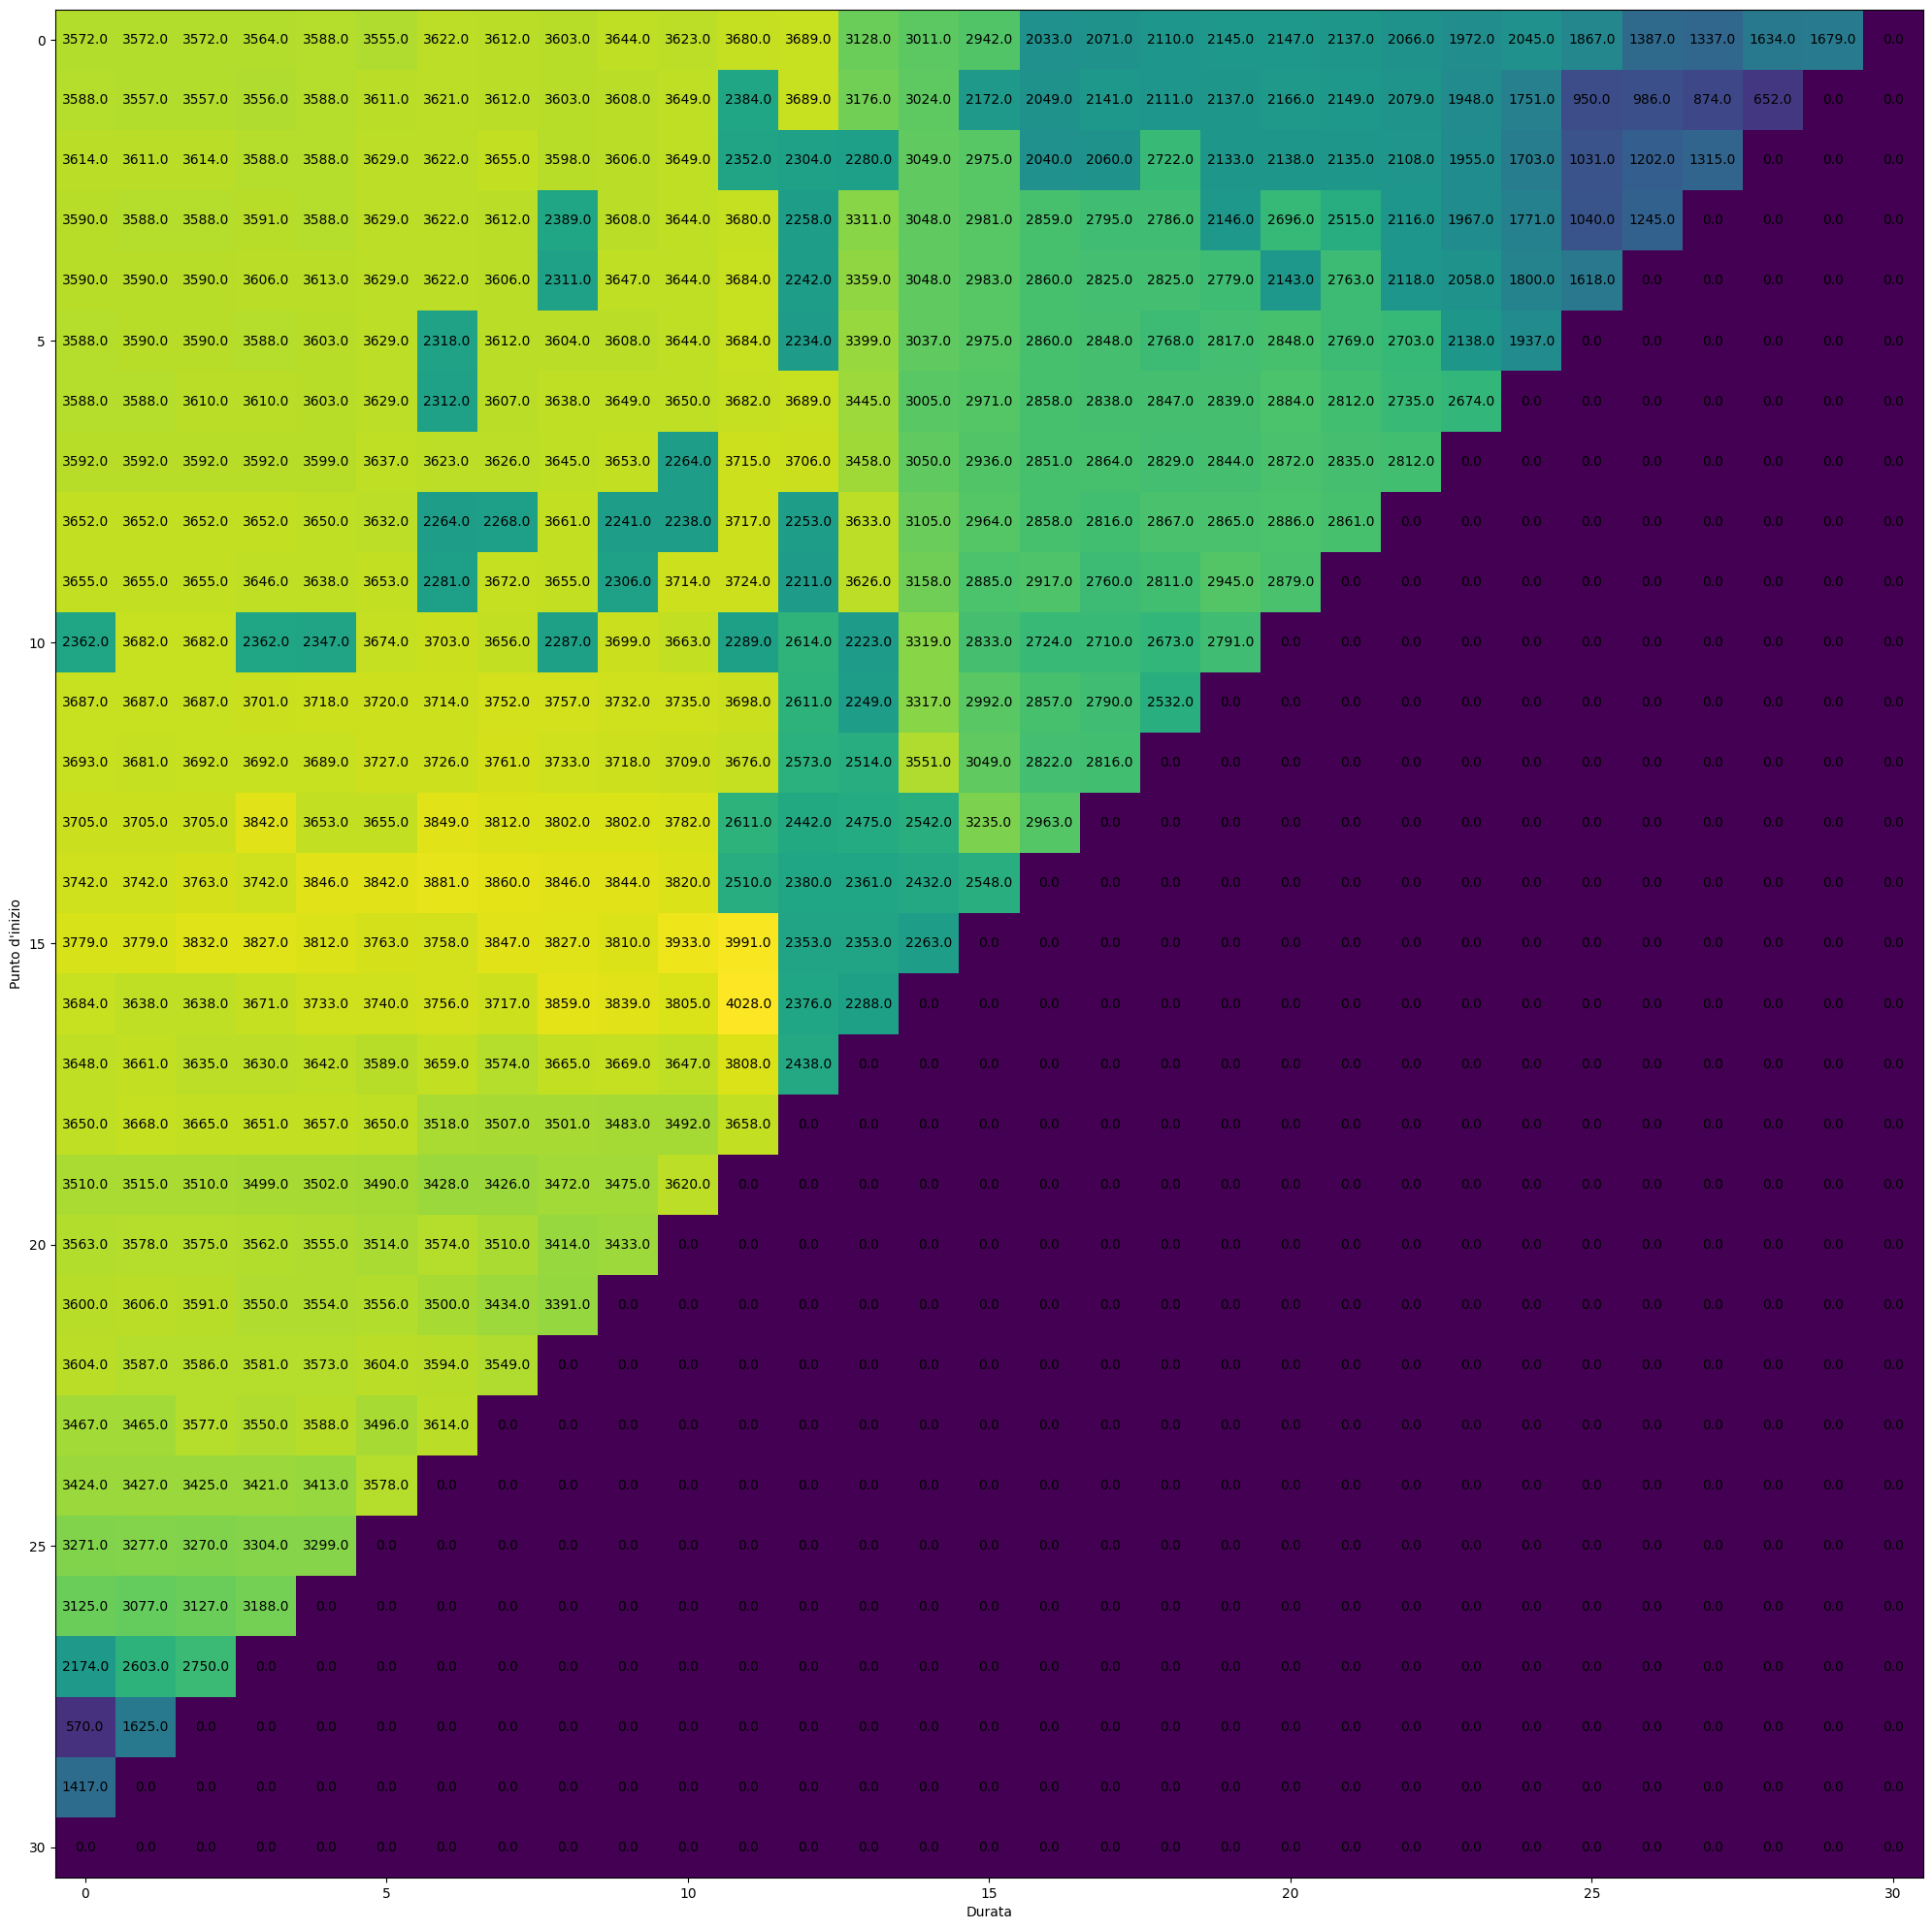

In [ ]:

fig, ax = plt.subplots()

total = 0
for p in range(0,num_cluster):
    total += m_separation[:,:,p]

mean_separation = total/num_cluster
image = ax.imshow(total)


plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(0,total.shape[0]):
    for j in range(0,total.shape[1]):
        c = np.round(total[i,j],decimals=0)
        ax.text(j, i, str(c), va='center', ha='center')

# Calcolo della media per ogni cluster

In [ ]:

cluster_mean = []


for a,s in zip(kmeans_total,newSeries_total):
    cluster_mean.append([])
    for y_pred,new_series in zip(a,s):
        rese_c1 = newResa3[y_pred == 0]
        rese_c2 = newResa3[y_pred == 1]
        rese_c3 = newResa3[y_pred == 2]

        rese = [rese_c1,rese_c2,rese_c3]
        meanValue = []

        for resa in rese:
            meanValue.append(np.mean(resa))
        cluster_mean[-1].append(meanValue)

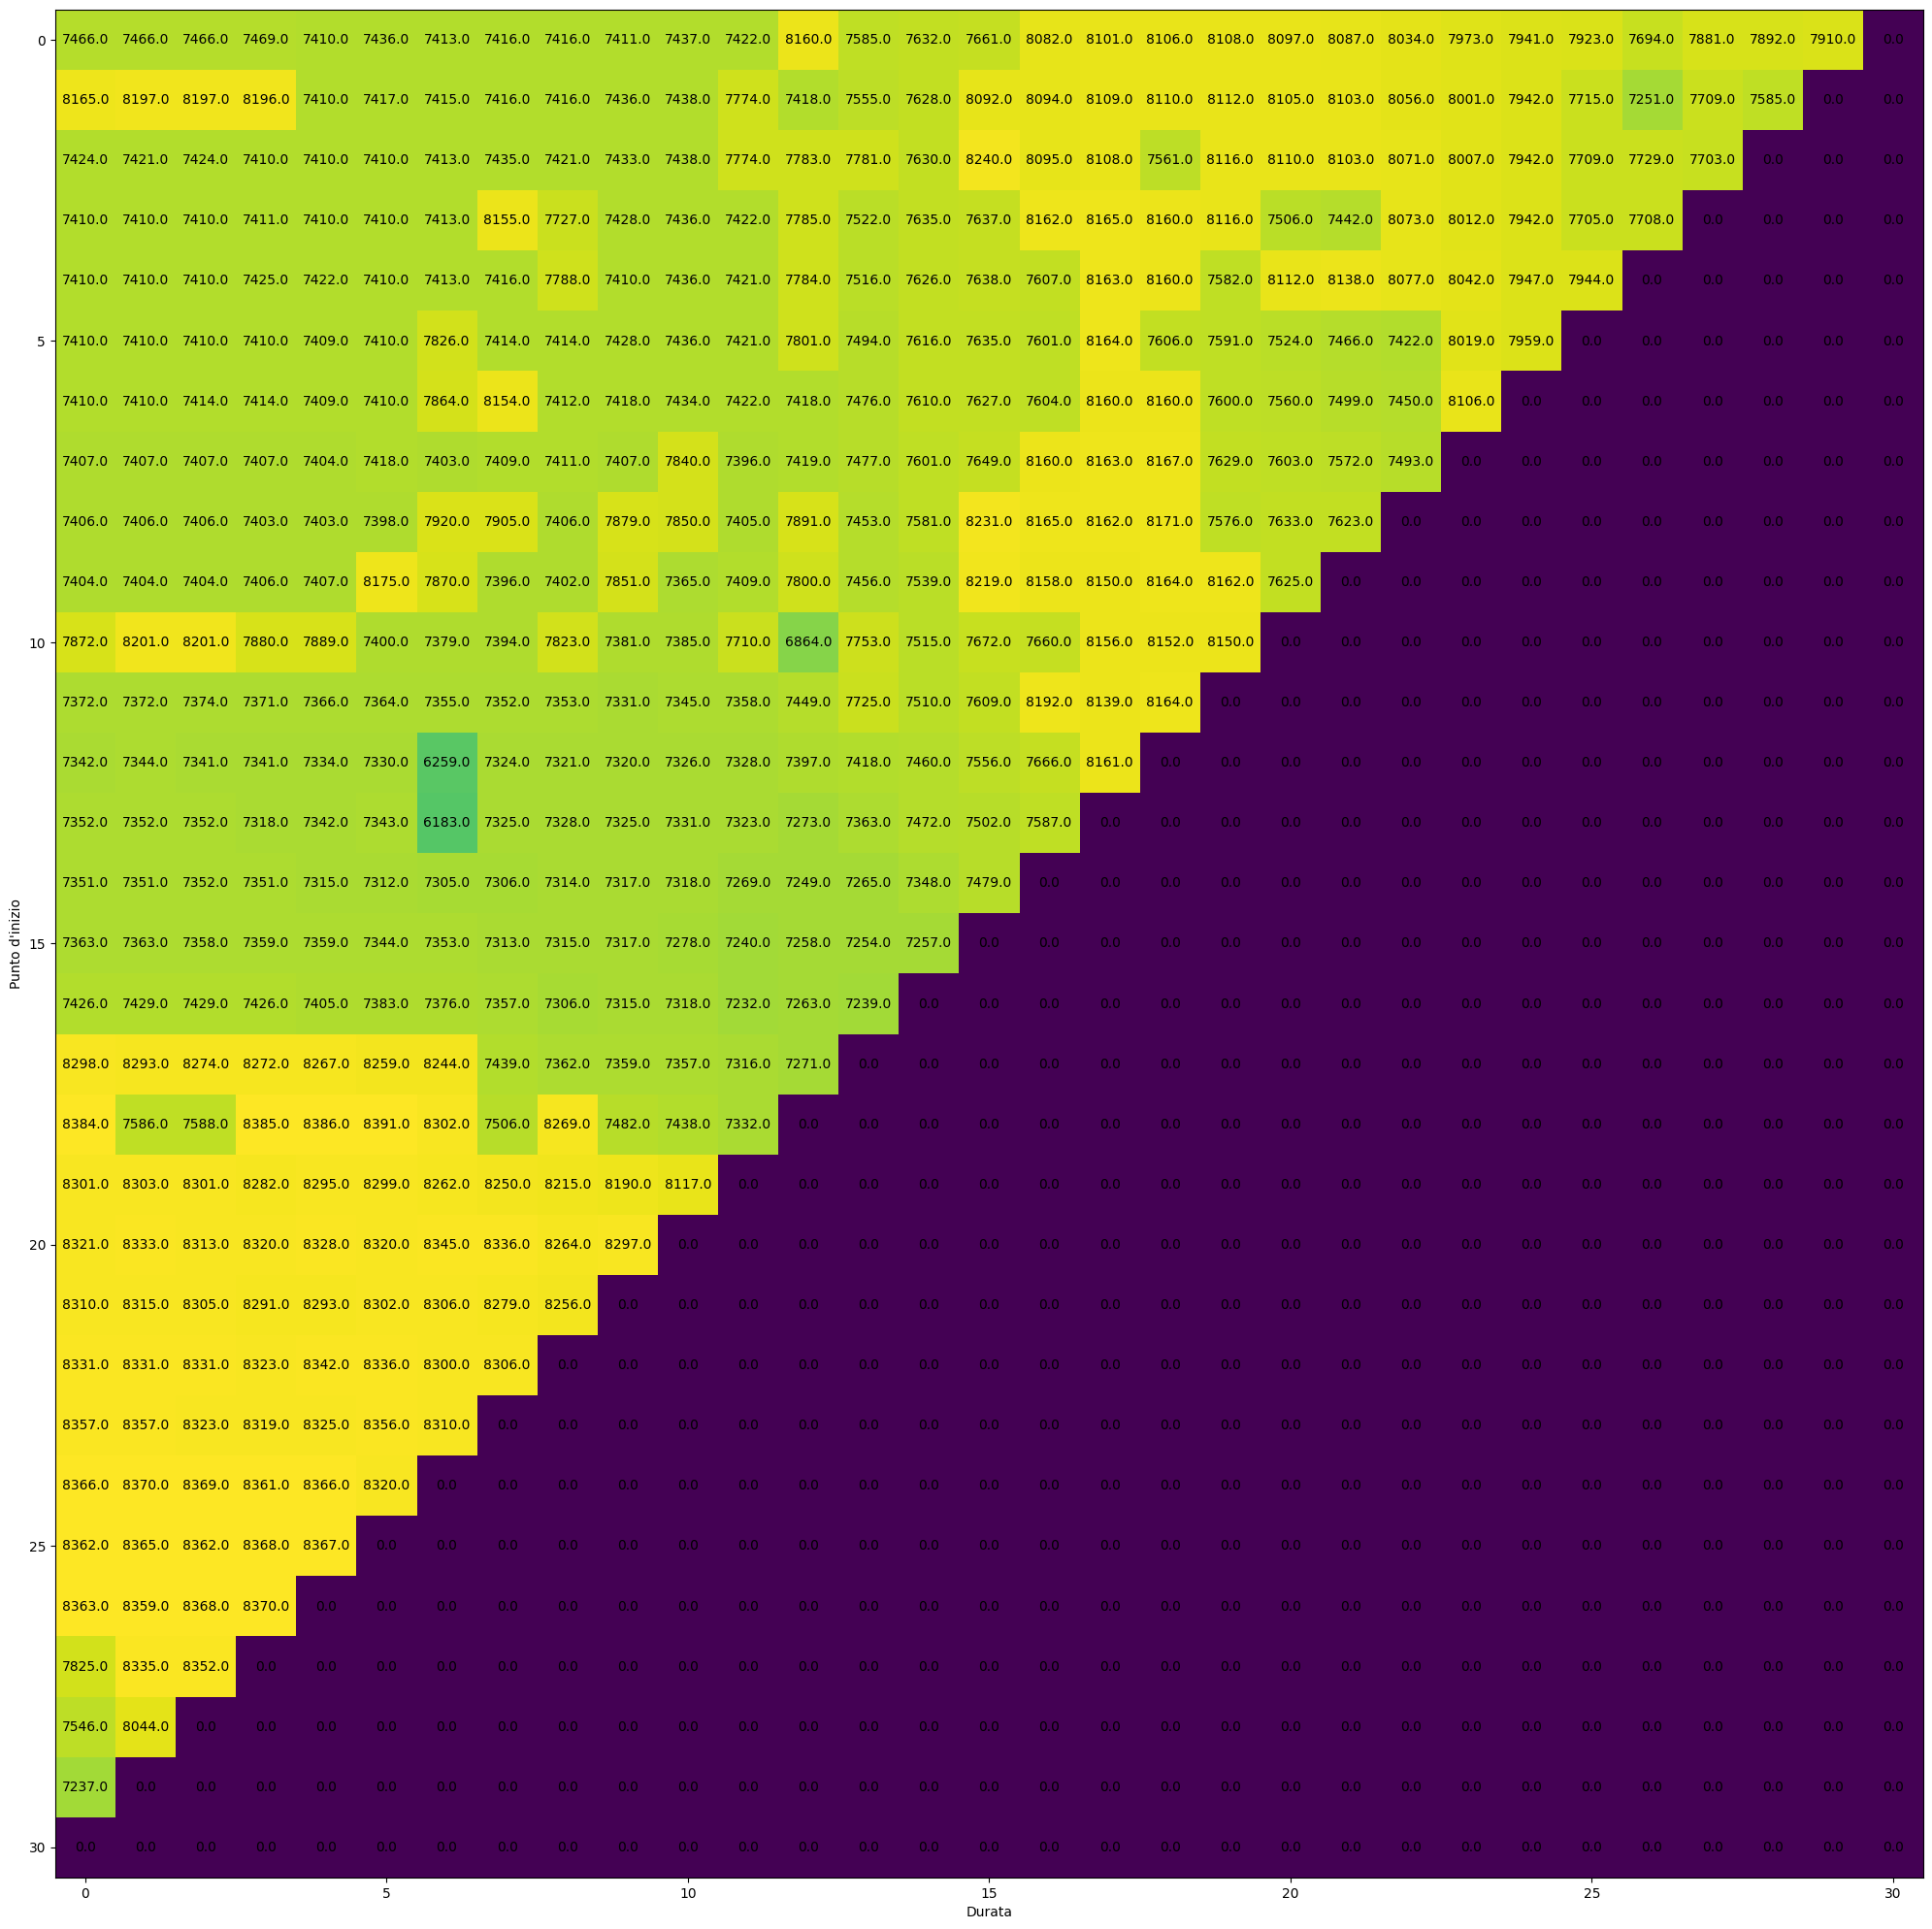

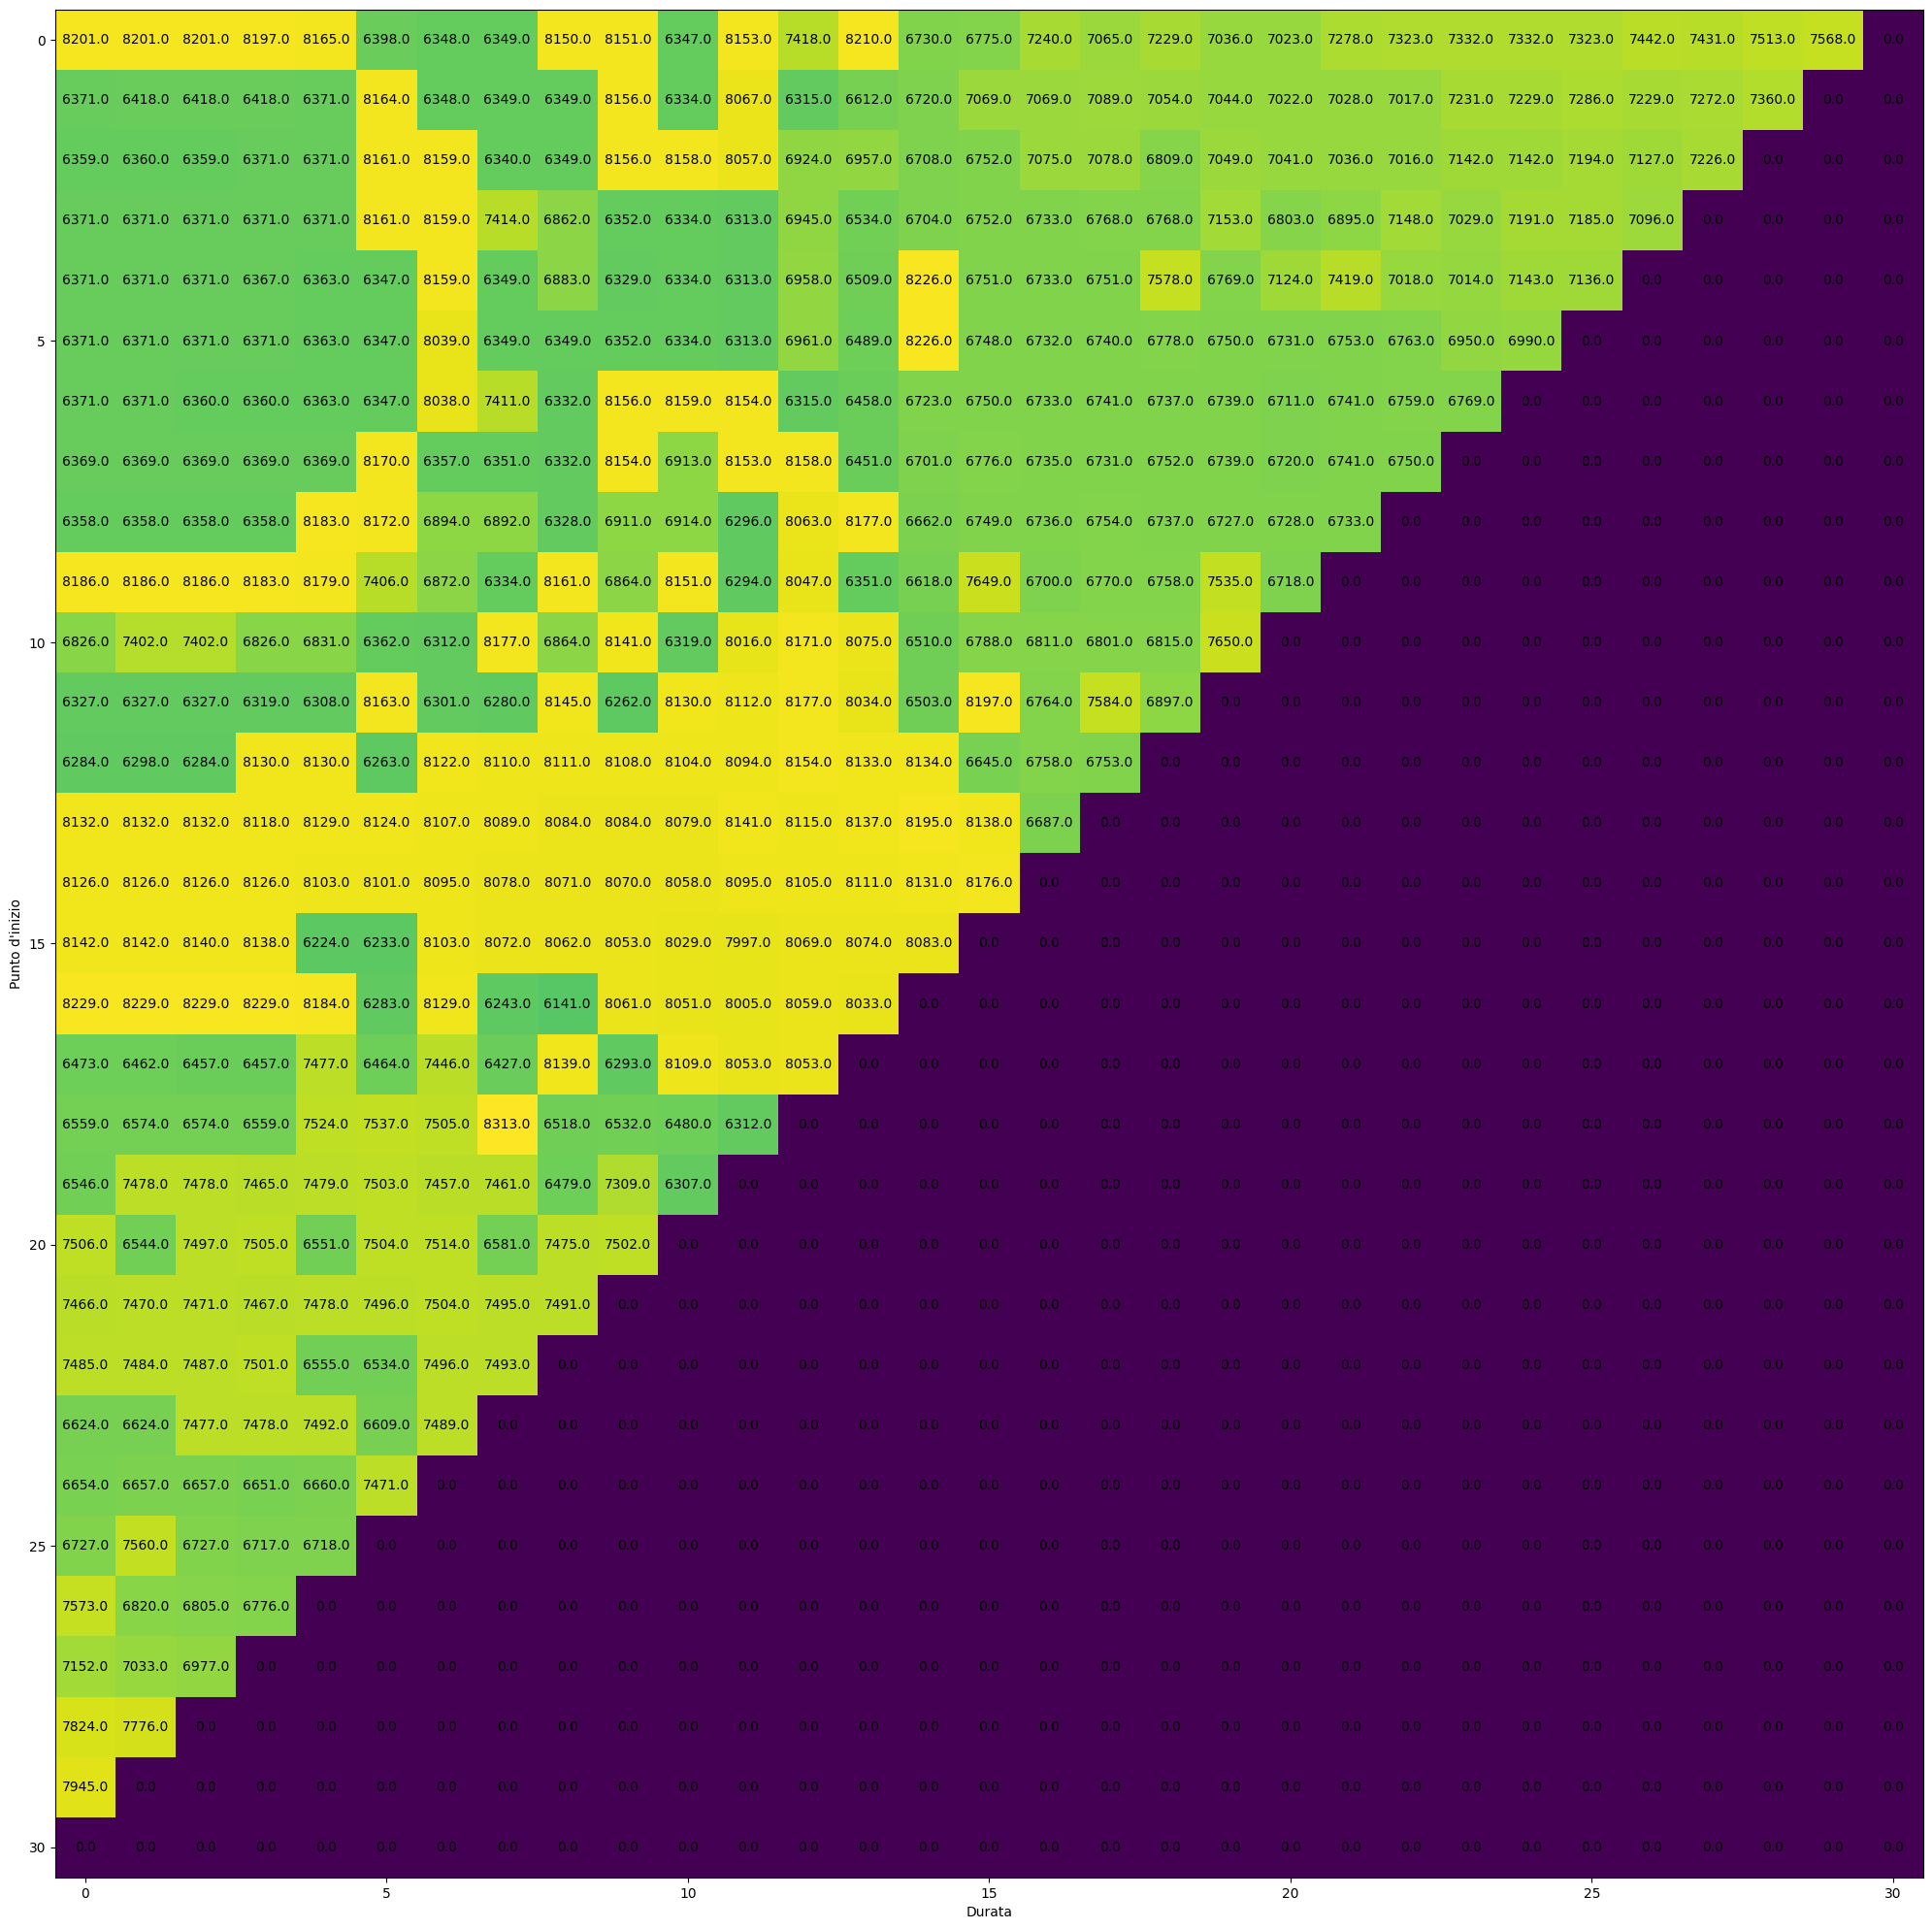

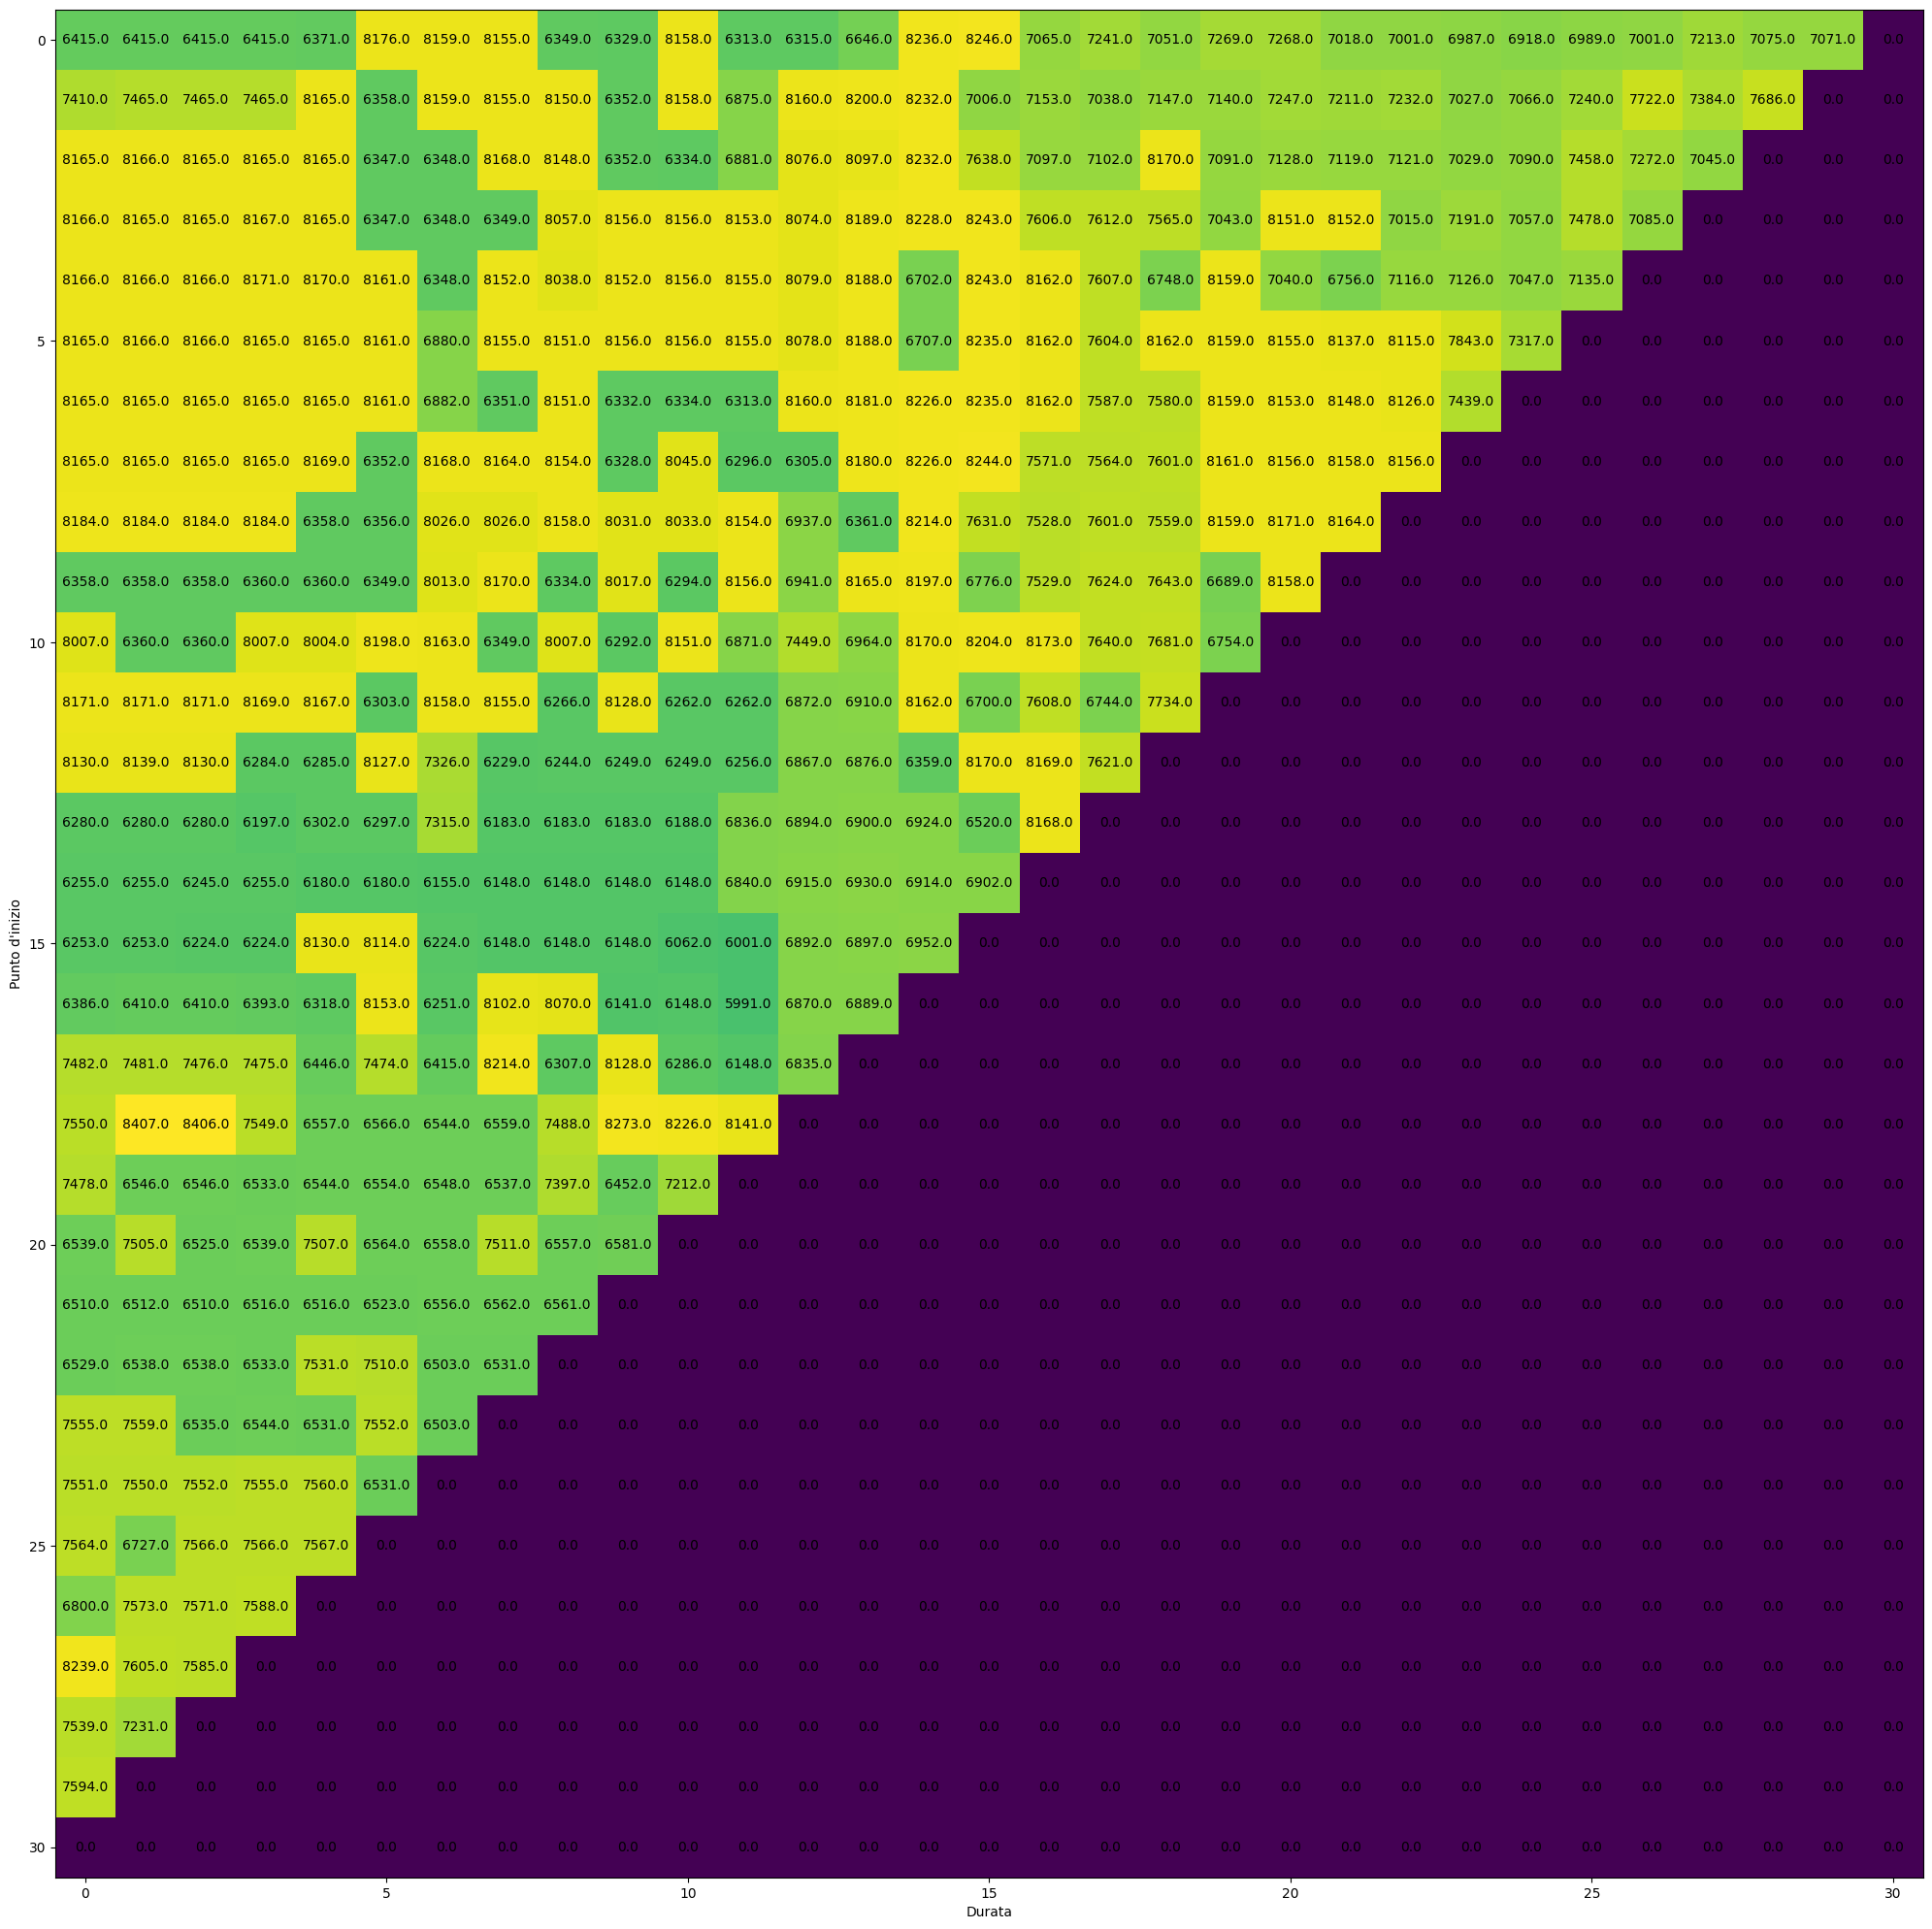

In [ ]:
# Andiamo a stampare le medie per ogni cluster

m_mean = np.zeros([int(155/5),int(155/5),3])

for cluster,y in zip(cluster_mean,range(0,int(155/5))):
    
    for a,x in zip(cluster,range(0,len(cluster))):
        for c,z in zip(a,range(0,num_cluster)):
            m_mean[x,y,z] = c


for p in range(0,num_cluster):
    fig, ax = plt.subplots()

    image = ax.imshow(m_mean[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")

    fig.set_size_inches(25,25)
    for i in range(0,m_mean.shape[0]):
        for j in range(0,m_mean.shape[1]):
            c = np.round(m_mean[i,j,p],decimals=0)
            ax.text(j, i, str(c), va='center', ha='center')

# Rappresentazione della deviazione standard e della media in uno scatter plot

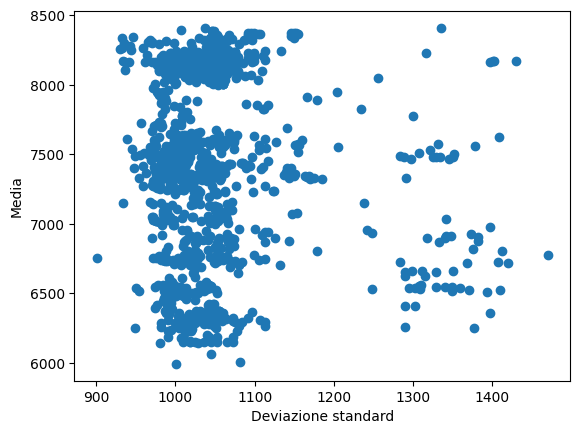

In [ ]:
x = m_deviation[m_deviation > 0].flatten()

y = m_mean[m_mean > 0].flatten()

plt.xlabel("Deviazione standard")
plt.ylabel("Media")

plt.scatter(x, y)
plt.show()